<font color=darkcyan>
<font size =5>
Problem Definition

<font color= black>
<font size =2.5>
    
 A tourism company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.



    

<font color=darkcyan>
<font size =5>
Objective

<font color=black>
<font size =2.5>
        
1. Analyze the customer data and provide recomendations to the Policy maker and Marketing team.
2. To predict which customer is more likely to purchase the newly introduced travel package.
3. Predict potential customer profile to marketing team.
3. Build models to predict potential target customer.


<font color=darkcyan>
<font size =5>
1.1 Loading all required libraries

In [615]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set()


# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# To build sklearn model

from sklearn import tree
import scipy.stats as stats

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV



<font color=darkcyan>
<font size =5>
1.2 Importing the Data Set

In [616]:
#Import the Loan Modelling data set
data = pd.read_excel("Tourism.xlsx",sheet_name='Tourism')

In [617]:
# copying data to another variable to avoid any changes to original data
tour = data.copy()

<font color=darkcyan>
<font size =5>
1.3 Structural Overview of the Data Set

<font color=darkorange>
<font size =4.5>
1.3.1 Viewing the first 10 and last 10 rows of the Data Set

In [618]:
tour.head(10)# Read top 10 values of the data set

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [619]:
tour.tail(10)# Read bottom 10 values of the data set

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4878,204878,1,35.0,Self Enquiry,1,17.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,3.0,0,4,0,1.0,Manager,24803.0
4879,204879,1,26.0,Self Enquiry,2,27.0,Small Business,Female,4,4.0,Basic,4.0,Married,2.0,1,3,0,2.0,Executive,22347.0
4880,204880,1,59.0,Self Enquiry,1,28.0,Small Business,Female,4,4.0,Deluxe,4.0,Married,6.0,0,3,1,2.0,Manager,28686.0
4881,204881,1,41.0,Self Enquiry,2,25.0,Salaried,Male,3,2.0,Basic,5.0,Married,2.0,0,1,1,2.0,Executive,21065.0
4882,204882,1,37.0,Self Enquiry,2,20.0,Salaried,Male,3,5.0,Basic,5.0,Married,6.0,1,5,1,2.0,Executive,23317.0
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


<font color = 'green'>
<font size =1 >
# Observations : 
The dataset looks clean and consistent with the description provided.

<font color=darkorange>
<font size =4.5>
1.3.2 Data columns of the given Loan Modelling Data Set

In [620]:
tour.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<font color = 'green'>
<font size =1 >
# Observations : 
The dataset consists of the above 20 columns.

<font color=darkorange>
<font size =4.5>
1.3.3 Checking the data shape

In [621]:
tour.shape #shape of dataset

(4888, 20)

<font color = 'green'>
<font size =1 >
# Observations : 
We have 4888 rows and 20 columns

<font color=darkorange>
<font size =4.5>
1.3.4 Checking the detailed information of the columns like data type, count, etc.

In [622]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. Integer columns are Customer Id, Prodtaken, CityTier, NumberOfPersonVisiting, Passport, PitchSatisfactionScore and OwnCar 
2. Float columns are Age,  DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting and MonthlyIncome
3. Object columns are TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus and Designation.
4. Customer Id is a unique number associated with each customer hence can be excluded from analysis. Check for repeating customers before discarding.
5. Prodtaken, Passport, OwnCar are boolean values hence can be converted to category.
6. ProdTaken is our target variable.
7. All the float values can be converted to integer. Check for missing values and treating missing values is required before converting them to integer columns.
8. Convert all object columns to integer.

<font color=darkorange>
<font size =4.5>
1.3.5 Checking for null values in the entire data set

In [623]:
tour.isnull().values.any() # If there are any null values in data set

True

In [624]:
# Check for null values in the data each column
tour.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Passport                      0
MaritalStatus                 0
ProductPitched                0
Designation                   0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
PitchSatisfactionScore        0
CityTier                      0
OwnCar                        0
ProdTaken                     0
CustomerID                    0
dtype: int64

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

DurationOfPitch, MonthlyIncome, Age, NumberOfTrips, NumberOfChildrenVisiting, NumberOfFollowups, PreferredPropertyStar and TypeofContact have missing values and need further evaluation and appropriate missing value treatment before model building.

<font color=darkorange>
<font size =4.5>
1.3.6 Summary of the Data Set

In [625]:
# Detailed summary of the data set
tour.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1.Monthly Income and Duration of Pitch data look right skewed and need further evaluation.

<font color=darkcyan>
<font size =5>
1.4 Fixing The Data Types

<font color=darkorange>
<font size =4.5>
1.4.1 Changing bool and object to categorical type

In [626]:

## Converting the data type of categorical features to 'category'
cat_cols = ['ProdTaken','Passport', 'OwnCar', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
tour[cat_cols] = tour[cat_cols].astype('category')
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

<font color = 'green'>
<font size =1 >
# Observations : 
All bool and object coulmns have been converted to category columns

<font color=darkorange>
<font size =4.5>
1.4.2 Removing redundant column "CustomerID"

In [627]:
# Drpo S.No. column
tour.drop(["CustomerID"], axis=1, inplace=True)
tour.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


<font color = 'green'>
<font size =1 >
# Observations : 
We now have a total of 19 columns.

<font color=darkorange>
<font size =4.5>
1.4.3 Checking Unique value in each column

In [628]:
# Unique category in each coulmn
for i in tour.columns:
    print(tour[i].value_counts())
    print("*" * 50)

0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, dtype: int64
**************************************************
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
9.0      483
7.0      342
8.0      333
6.0      307
1

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. Prod Taken, Passport, Own car is a yes or no column represented by `0 : No` and `1 :Yes`
2. Age has a very varied data range from less than 20 to more than 60.
3. Type of Contact is either `Self Enqiured` or `Company Invited`.
4. City tier is 1,2,3 corresponding to City `tier 1` ,`tier 2`, `tier 3`.
5. Duration of pitch has a varied range from 5 to 127. Needs further evaluation.
6. Number of person visiting ranges from 1 to 5.
7. Number of followups by sales rep ranges from 1 to 6.
8. Five packages are pitched to customers `Basic`, `Standard`, `Super Deluxe`, `Deluxe`, `King`
9. Prefered property star is 3,4,5.
10. Marital Status is  `Married`, `single`, `unmarried` and `divorced`.
11. Wide range of trips  per year from 1 to 22.
12. Pitch satisfaction score from 1 to 5.
13. Number of children visiting from 0 to max 3
14. Designation is `Executive`, `Manager`, `Senior Manager`, `AVP`,`VP`.
15. Monthly income has a very wide range need binning for any further evaluation.
16. Occupation is `Salaried`, `Small business`, `Large Business`, `Free Lancer`.
17. Gender is `Male` , `Female` and `Fe Male`. The 'Fe Male' looks like a typing error hence will combinewith female for further evaluation.

In [629]:
#Summary of categorical columns
tour.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. Maximum customer have self enquired, are Salaried, Male and Married.
2. Max customers have  Executive designation.
3. Max customers have not taken product.
4. Max customers  donot have a passport.
5. Max customers have a car.

In [630]:
#Summary of numerical columns
tour.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. Few of the columns have skewed data, need further evaluation.
2. Many columns have missing values.    

    

<font color=darkorange>
<font size =4.5>
1.4.4 Combining 'Fe Male' and 'Female' in Gender column

In [631]:
# Replacing Fe Male with Female as it looks like a typing error in data
tour["Gender"].replace({"Fe Male": "Female"}, inplace=True)
tour["Gender"].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

<font color=darkcyan>
<font size =5>
1.5 Univariate Analysis

<font color=darkorange>
<font size =4.5>
1.5.1 Histogram of all the given columns

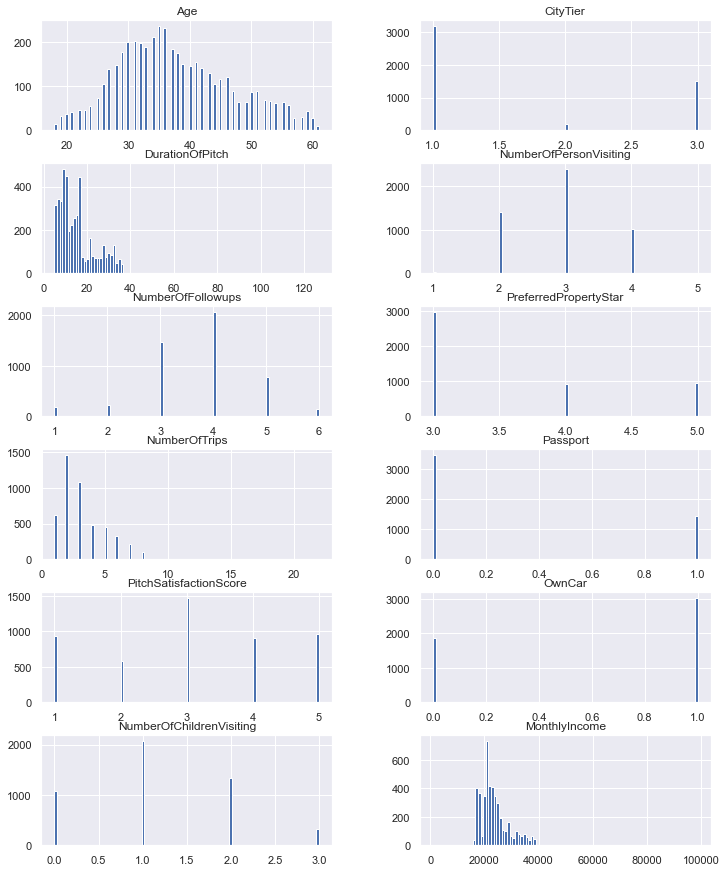

In [632]:
# Plotting a histogram of all numerical columns in the dataset
columns = list(data)[2:20]# All columns in the data set
data[columns].hist(stacked=False, bins=100, figsize=(12,52), layout=(20,2)); # plot histogram


<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>
<font size =1 >

1. Age , Duration of pitch and monthly income are widely spread need further detailed evaluation.
2. Duration of Pitch, monthly income, number of trips column data look right skewed. 
3. Customers from Tier 1 and tier 3 cities are more as compared to tier 2
4. Most Preferred property star is 3 and most pitch satisfaction score is 3.
5. Most of the people own a car. Most people don’t have a passport.
6. Most customers are traveling with one children under the age of 5 with them.

<font color=darkorange>
<font size =4.5>
1.5.2 Univariate analysis of numerical variables to study their central tendency and dispersion.

In [633]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
#  Writing a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="cyan"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.countplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        feature, kde=False, ax=ax_hist2,palette="winter"
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<font color=darkorange>
<font size =4.5>
1.5.2.1 Boxplot and Histogram of Age

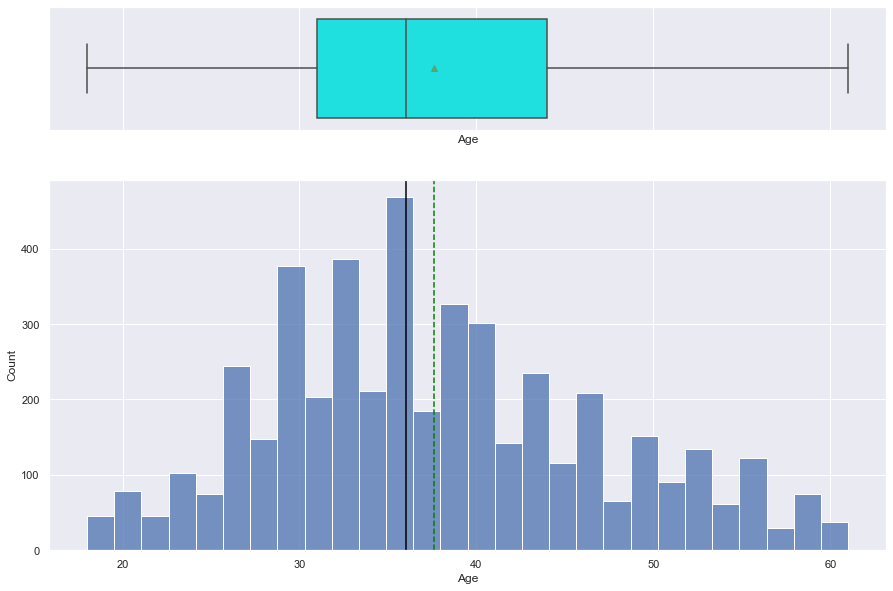

In [634]:

histogram_boxplot(tour['Age'])# Plotting Age



<font color=green>
<font size =1>
# Observations : 
    1) Age roughly varies from 18 to 62.
    2) Age group of 30 to 40 has maximum customers.
    3) No skew, no outliers.

    


<font color=darkorange>
<font size =4.5>
1.5.2.2 Boxplot and Histogram of MonthlyIncome

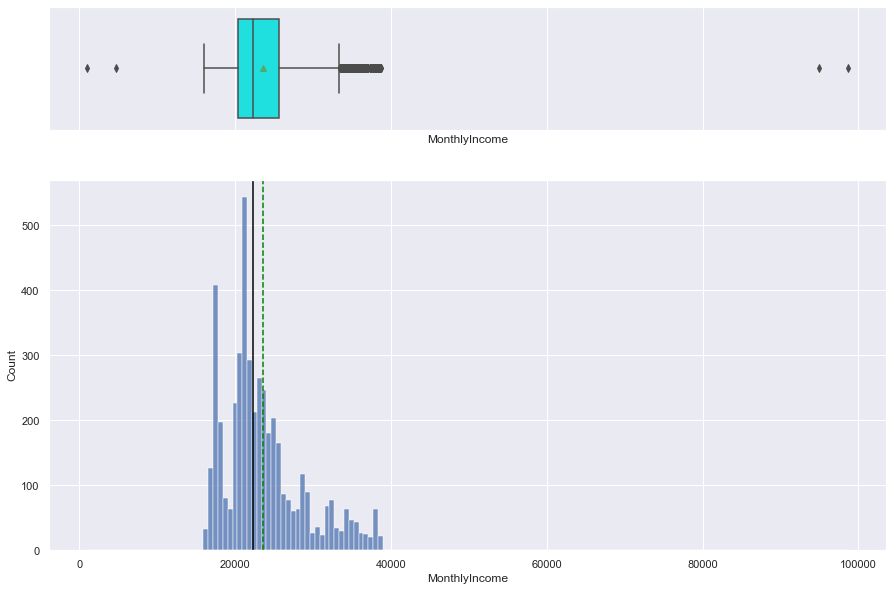

In [635]:
histogram_boxplot(data["MonthlyIncome"])# Plotting MonthlyIncome

<font color=green>
<font size =1>
# Observations : 
    1) Outliers are present.
    2) Slightly right skewed.
    3) Maximum customers with income group 15K to 25K monthly.
    4) Needs Binning and further evaluation.


<font color=darkorange>
<font size =4.5>
1.5.2.3 Boxplot and Histogram of DurationOfPitch

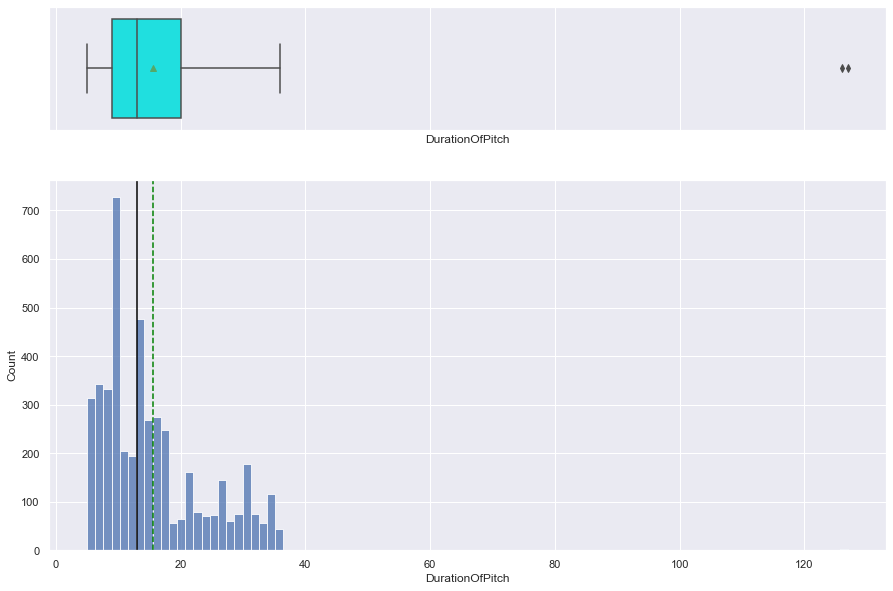

In [636]:
histogram_boxplot(data["DurationOfPitch"])# Plotting DurationOfPitch

<font color=green>
<font size =1>
# Observations : 
    1) Mostly Right Skewed .
    2) Few outliers are present
    3) Maximum Duration of Pitch is 10- 20 minutes.

<font color=darkorange>
<font size =4.5>
1.5.3 Percentage analysis of each category.

In [637]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<font color=darkorange>
<font size =4.5>
1.5.3.1 Percentage by Type of Contact

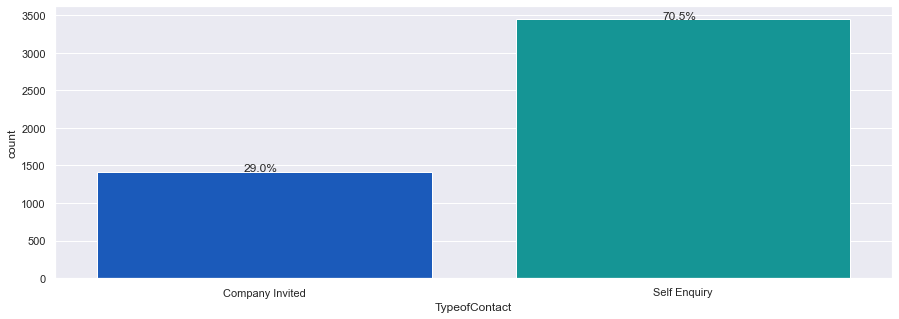

In [638]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["TypeofContact"],
    palette="winter",
    
)
perc_on_bar(ax, tour["TypeofContact"])

<font color=green>
<font size = 1>
# Observations : 
70.5% of contact type are Self Enquiry.


<font color=darkorange>
<font size =4.5>
1.5.3.2 Percentage by City Tier

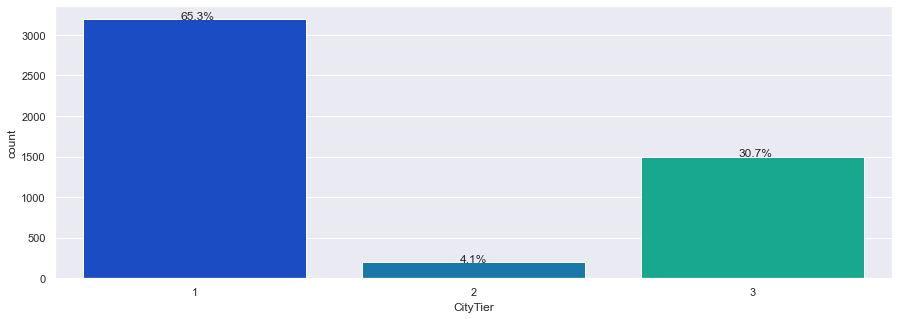

In [639]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["CityTier"],
    palette="winter",
    
)
perc_on_bar(ax, tour["CityTier"])

<font color=green>
<font size = 1>
# Observations : 
Tier 1 cities have most purchases i.e 65.3% followed by tier 3 cities at 30.7%.


<font color=darkorange>
<font size =4.5>
1.5.3.3 Percentage by Occupation

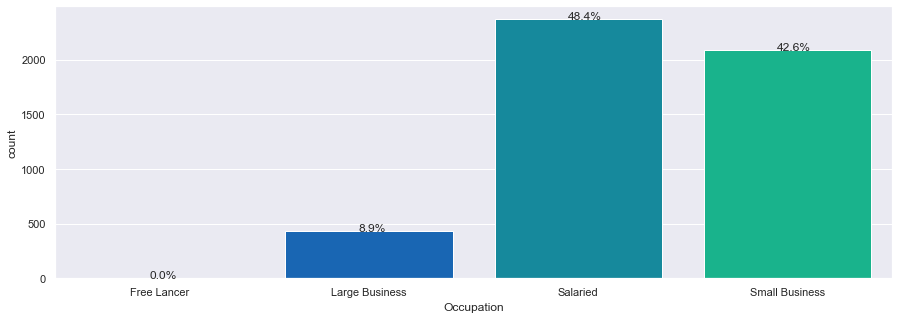

In [640]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["Occupation"],
    palette="winter",
    
)
perc_on_bar(ax, tour["Occupation"])

<font color=green>
<font size = 1>
# Observations : 
Salaried person have maximum purchase closely followed by small business occupation with 48.4% and 42.6 % respectively.


<font color=darkorange>
<font size =4.5>
1.5.3.4 Percentage by Gender

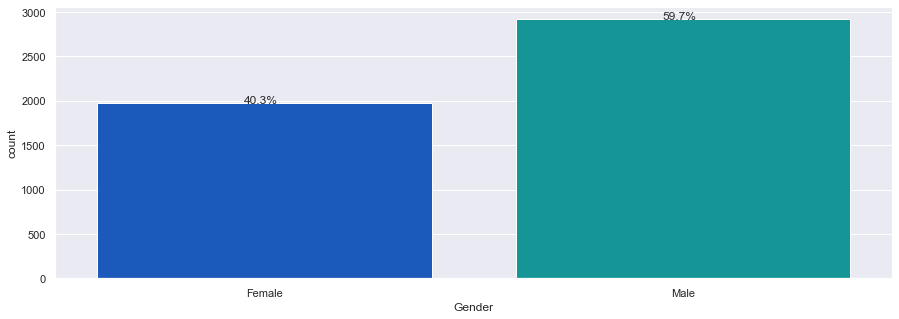

In [641]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["Gender"],
    palette="winter",
    
)
perc_on_bar(ax, tour["Gender"])

<font color=green>
<font size = 1>
# Observations : 
Most purchases are by male customers with 59.7% .


<font color=darkorange>
<font size =4.5>
1.5.3.5 Percentage by Number Of Person Visiting

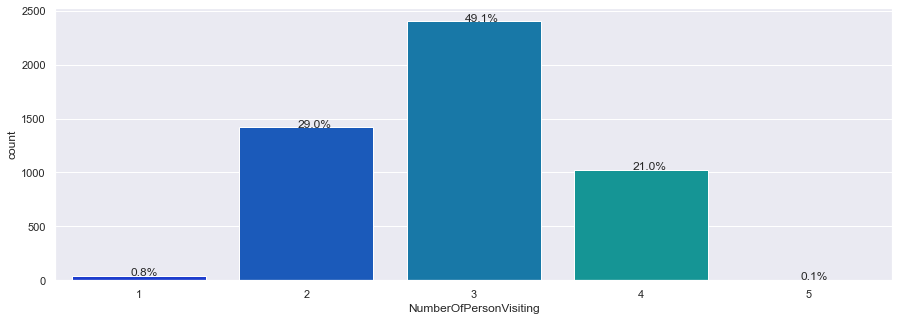

In [642]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["NumberOfPersonVisiting"],
    palette="winter",
    
)
perc_on_bar(ax, tour["NumberOfPersonVisiting"])

<font color=green>
<font size = 1>
# Observations :
Most common traveling group are for 3 people with customer.


<font color=darkorange>
<font size =4.5>
1.5.3.6 Percentage by Preferred Property Star

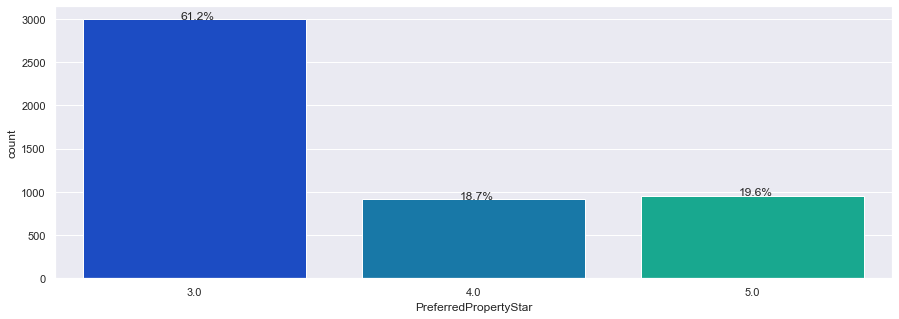

In [643]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["PreferredPropertyStar"],
    palette="winter",
    
)
perc_on_bar(ax, tour["PreferredPropertyStar"])

<font color=green>
<font size = 1>
# Observations :
Most commonly preferred property is with star rating of 3.


<font color=darkorange>
<font size =4.5>
1.5.3.7 Percentage by Marital status of customer

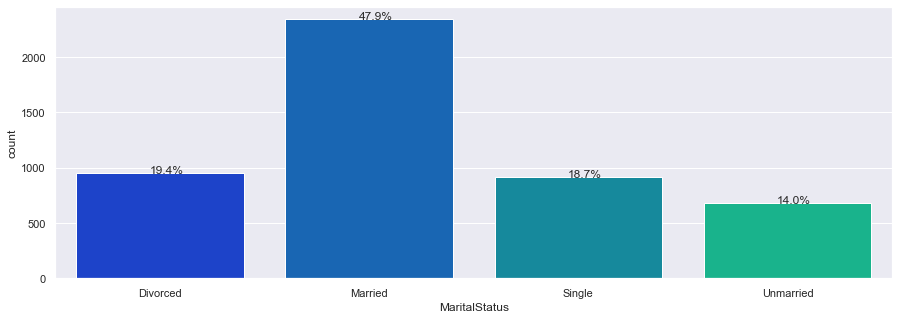

In [644]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["MaritalStatus"],
    palette="winter",
    
)
perc_on_bar(ax, tour["MaritalStatus"])

<font color=green>
<font size = 1>
# Observations :
47.9% Married customers. Most customers are married.


<font color=darkorange>
<font size =4.5>
1.5.3.8 Percentage by Number Of Trips in a year by customer.

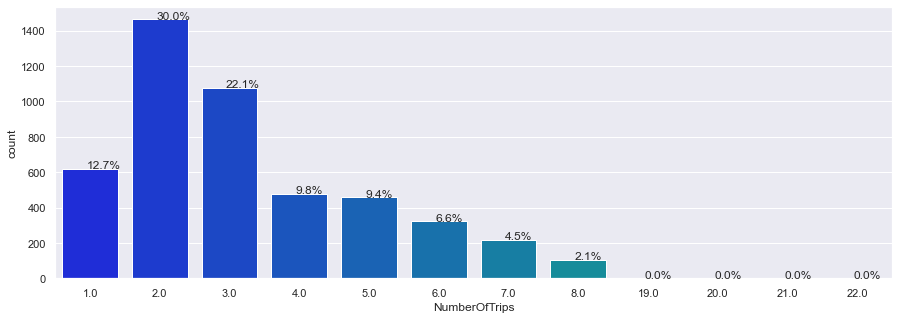

In [645]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["NumberOfTrips"],
    palette="winter",
    
)
perc_on_bar(ax, tour["NumberOfTrips"])

<font color=green>
<font size = 1>
# Observations :
30% of customers take two trips per year and 22.1 % take three trips.


<font color=darkorange>
<font size =4.5>
1.5.3.9 Percentage of customers with or without passport

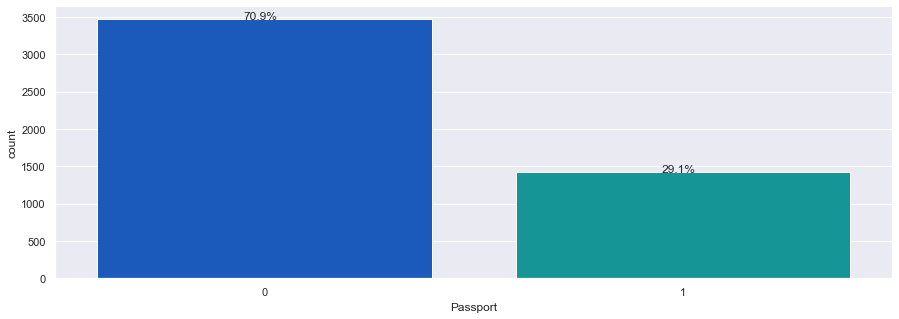

In [646]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["Passport"],
    palette="winter",
    
)
perc_on_bar(ax, tour["Passport"])

<font color=green>
<font size = 1>
# Observations :
70.9% of customers don't have passports.


<font color=darkorange>
<font size =4.5>
1.5.3.10 Percentage of customers with or without car

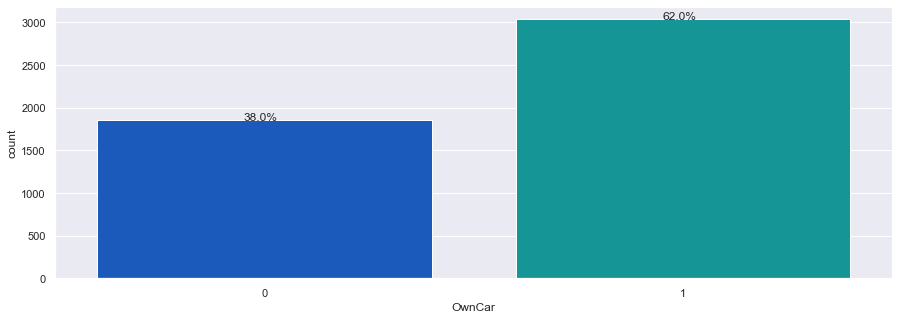

In [647]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["OwnCar"],
    palette="winter",
    
)
perc_on_bar(ax, tour["OwnCar"])

<font color=green>
<font size = 1>
# Observations :
62% of customers own a car.


<font color=darkorange>
<font size =4.5>
1.5.3.11 Percentage of total number of children with age less than five taking the trip with customer.

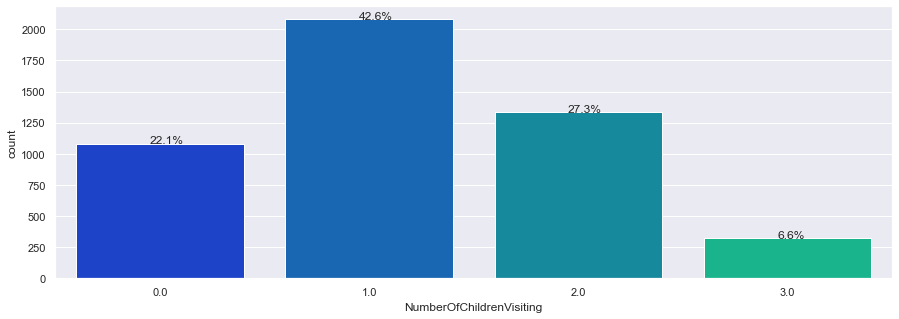

In [648]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["NumberOfChildrenVisiting"],
    palette="winter",
    
)
perc_on_bar(ax, tour["NumberOfChildrenVisiting"])

<font color=green>
<font size = 1>
# Observations :
42% of customers are traveling with one child.


<font color=darkorange>
<font size =4.5>
1.5.3.12 Percentage by designation of customer in current organization

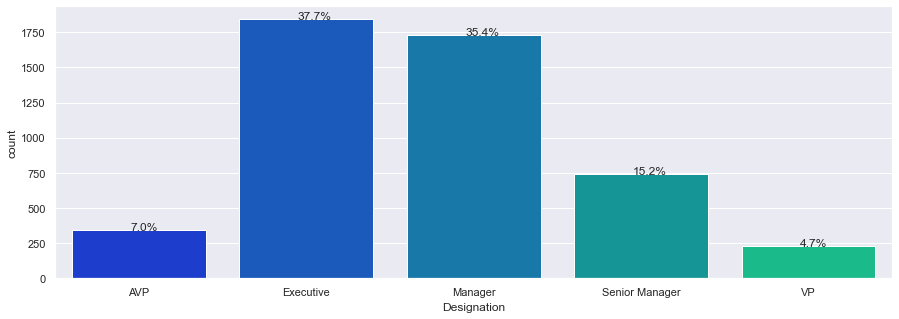

In [649]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["Designation"],
    palette="winter",
    
)
perc_on_bar(ax, tour["Designation"])

<font color=green>
<font size = 1>
# Observations :
 37% of people hold a designation of executive and 35% hold a designation of manager in their respective current organizations.


<font color=darkorange>
<font size =4.5>
1.5.3.13 Percentage by Pitch Satisfaction score

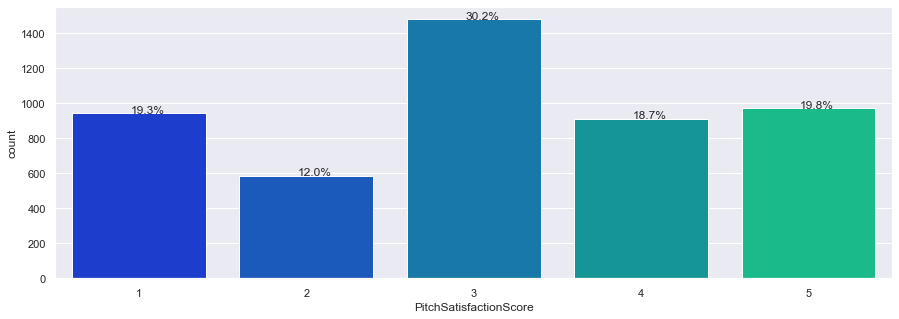

In [650]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["PitchSatisfactionScore"],
    palette="winter",
    
)
perc_on_bar(ax, tour["PitchSatisfactionScore"])

<font color=green>
<font size = 1>
# Observations :
30% of customers have given a pitch satisfaction score of '3'.


<font color=darkorange>
<font size =4.5>
1.5.3.14 Percentage of Product pitched by salesperson

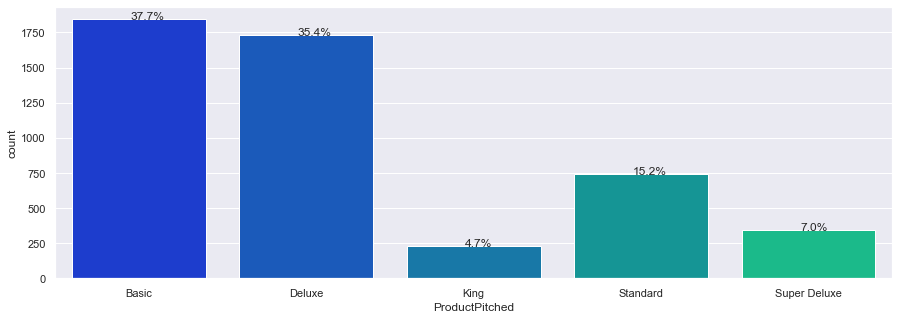

In [651]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["ProductPitched"],
    palette="winter",
    
)
perc_on_bar(ax, tour["ProductPitched"])

<font color=green>
<font size = 1>
# Observations :
Most product pitched by sales person is Basic and Deluxe package with 37.7% and 35.4% respectively


<font color=darkorange>
<font size =4.5>
1.5.3.15 Observations on total number of followups

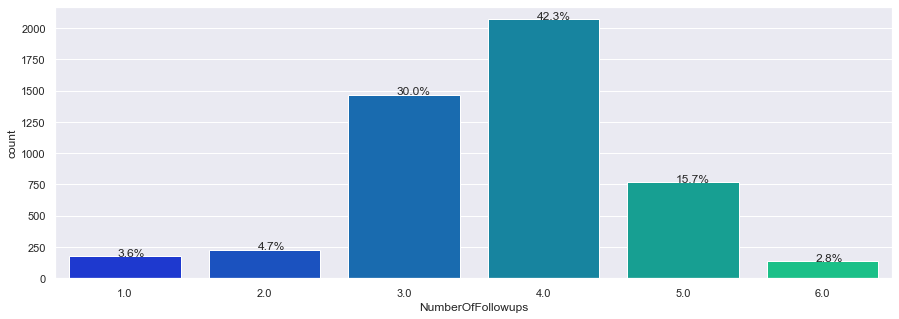

In [652]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    tour["NumberOfFollowups"],
    palette="winter",
    
)
perc_on_bar(ax, tour["NumberOfFollowups"])

<font color=green>
<font size = 1>
# Observations :
Mostly salesperson made 3 or 4 followups after their pitch.

<font color=darkorange>
<font size =4.5>
1.5.3.16 Observation on Binned Monthly Income 

In [653]:
#Making  a copy of the data set 
tour_bin1 = tour.copy()

In [654]:
# Treating missing value for binning
tour_bin1['MonthlyIncome'] = tour_bin1['MonthlyIncome'].fillna(tour_bin['MonthlyIncome'].mean())


In [655]:
tour_bin1["ProdTaken"] = tour_bin["ProdTaken"].astype('int64')

<font color=darkorange>
<font size =4.5>
1.6.5.3 Monthly Income binned

In [656]:
# Monthly Income binned for better categorization
binned_inc = pd.cut(tour_bin1['MonthlyIncome'], [-np.inf,20000,25000, 30000, 35000,np.inf])
binned_inc



0       (20000.0, 25000.0]
1       (20000.0, 25000.0]
2          (-inf, 20000.0]
3          (-inf, 20000.0]
4          (-inf, 20000.0]
               ...        
4883    (25000.0, 30000.0]
4884    (20000.0, 25000.0]
4885    (30000.0, 35000.0]
4886    (20000.0, 25000.0]
4887    (20000.0, 25000.0]
Name: MonthlyIncome, Length: 4888, dtype: category
Categories (5, interval[float64]): [(-inf, 20000.0] < (20000.0, 25000.0] < (25000.0, 30000.0] < (30000.0, 35000.0] < (35000.0, inf]]

In [657]:
binned_inc.value_counts(dropna=False)


(20000.0, 25000.0]    2490
(-inf, 20000.0]       1040
(25000.0, 30000.0]     768
(30000.0, 35000.0]     382
(35000.0, inf]         208
Name: MonthlyIncome, dtype: int64

In [658]:
# Assigning labels to categories
tour_bin1['MonthlyIncome_bin'] = pd.cut(
    tour_bin1['MonthlyIncome'], [-np.inf,20000,25000, 30000, 35000,np.inf], 
    labels = [ "15K-20K", "20k-25K","25K-30K", "30K-35K","35K and above"]
)

tour_bin1['MonthlyIncome_bin'].value_counts(dropna=False)




20k-25K          2490
15K-20K          1040
25K-30K           768
30K-35K           382
35K and above     208
Name: MonthlyIncome_bin, dtype: int64

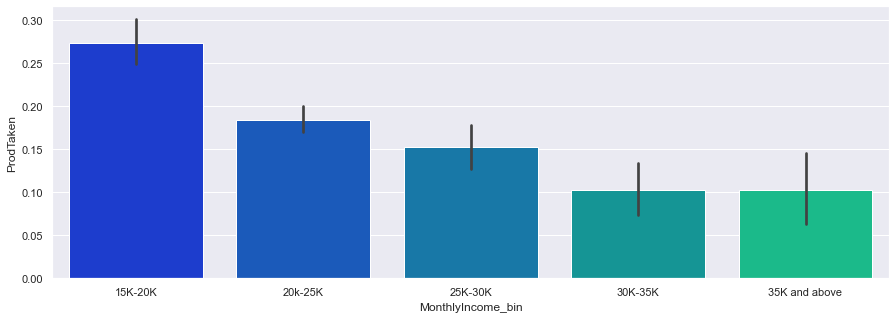

In [659]:

plt.figure(figsize=(15,5))
ax=sns.barplot(x='MonthlyIncome_bin', y='ProdTaken', data= tour_bin1, palette='winter') 


<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. 15k -20k is the maximum customer income group 


<font color=darkcyan>
<font size =5>
1.6 Bivariate Analysis

In [660]:
tour_bi = tour.copy()

<font color=darkorange>
<font size =4.5>
1.6.1 Pair plots of all numerical data

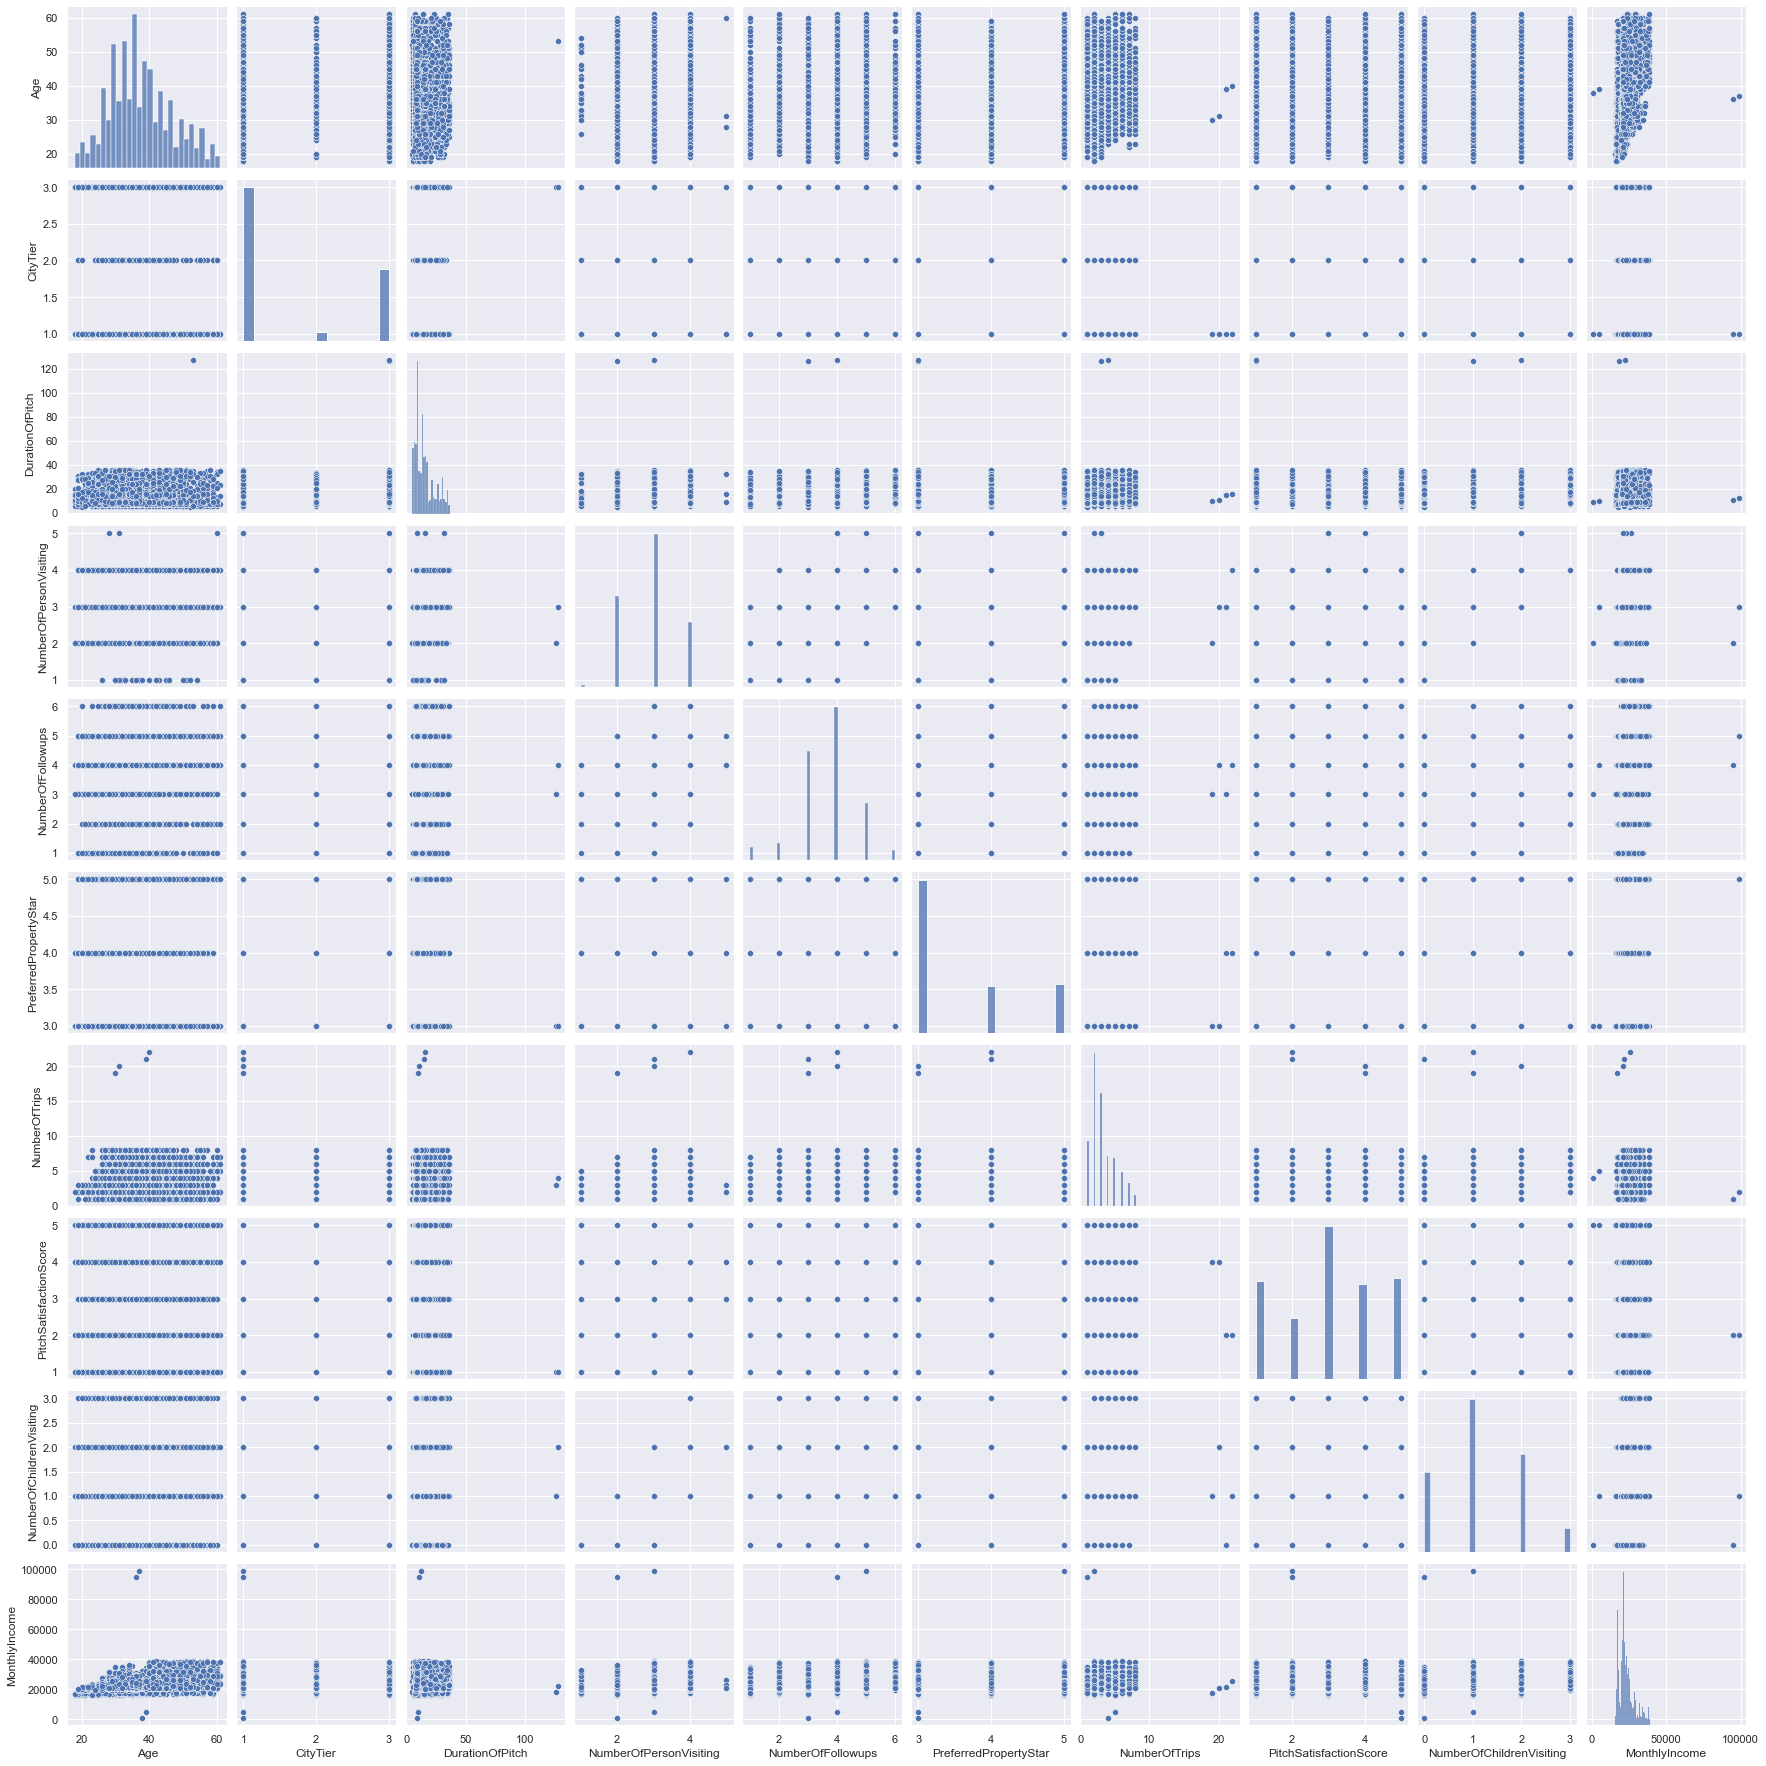

In [661]:
# Plotting pair plots between all numerical columns
#sns.pairplot(tour_bi)
num_col =['Age','CityTier','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips','PitchSatisfactionScore','NumberOfChildrenVisiting','MonthlyIncome']
sns.pairplot(tour_bi[num_col])
plt.show()

<font color=darkorange>
<font size =4.5>
1.6.2 Plotting a heat map

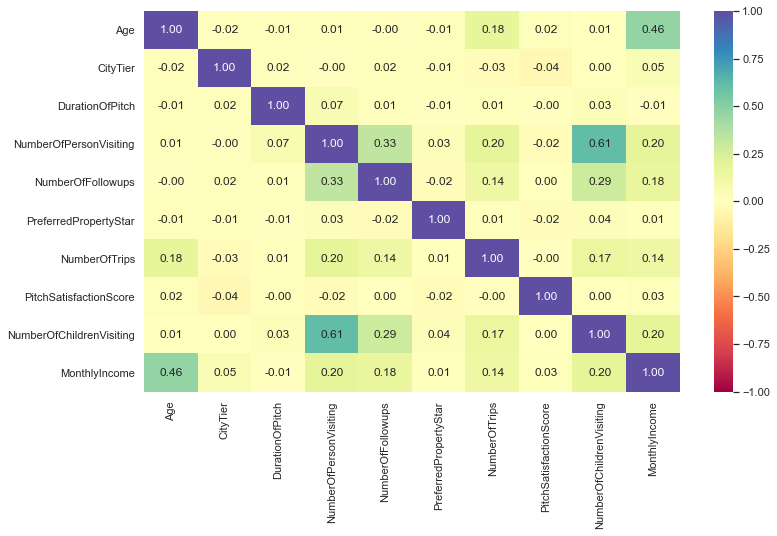

In [662]:
# Plotting a heat map
plt.figure(figsize=(12, 7))
sns.heatmap(
    tour_bi.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1. There is a considerable correlation between number of children visiting and number of person visiting.
2. Number of followups has a slight correlation to number of person visiting
3. Monthly income and age has a correlation

<font color=darkorange>
<font size =4.5>
1.6.3 Plotting a Bar Plot Correlation between ProdTaken and all other Dependent paparameters

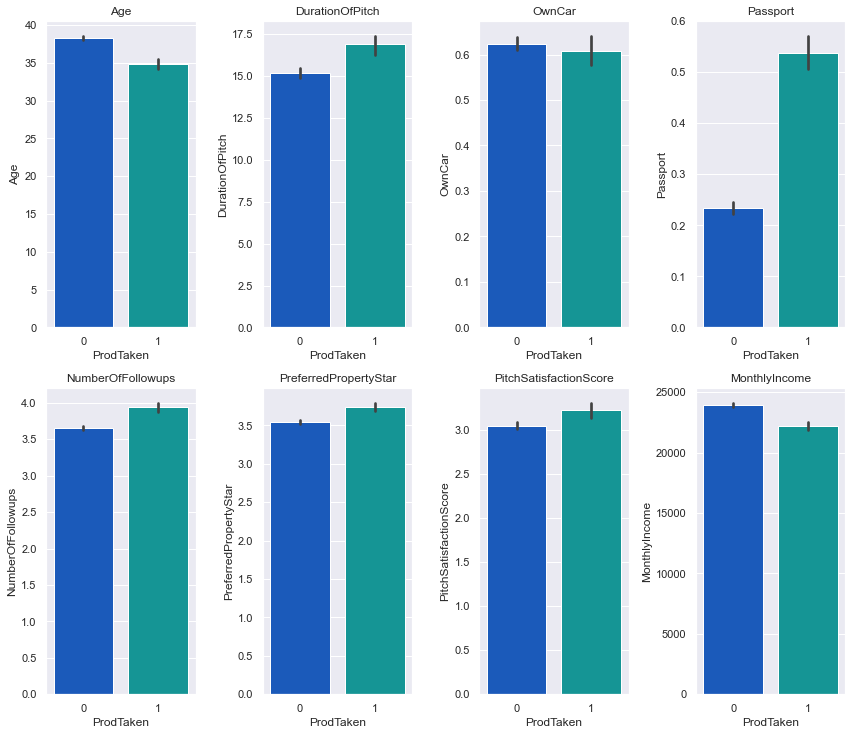

In [663]:
cols = data[
    [
        'Age','DurationOfPitch','OwnCar','Passport','NumberOfFollowups', 'PreferredPropertyStar','PitchSatisfactionScore','MonthlyIncome',
         ]
].columns.tolist()
plt.figure(figsize=(12,15 ))

for i, variable in enumerate(cols):
    plt.subplot(3, 4, i + 1)
    sns.barplot(data["ProdTaken"], data[variable], palette="winter")
    plt.tight_layout()
    plt.title(variable)
plt.show()

<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Customers in lower age group are more likely to take product package.
2. More the duration of the pitch more chances of product package being taken.
3.  Higher the pitch satisfaction score, more followups and higher preferred star rating  increases the chances of product taken.
4. People with passport are more likely to go on a trip.
5. Owning a car or no car does not have any significant  impact on taking a package.


<font color=darkorange>
<font size =4.5>
1.6.4 Plotting a Bar Plot Correlation between Product Pitched and all other Dependent paparameters

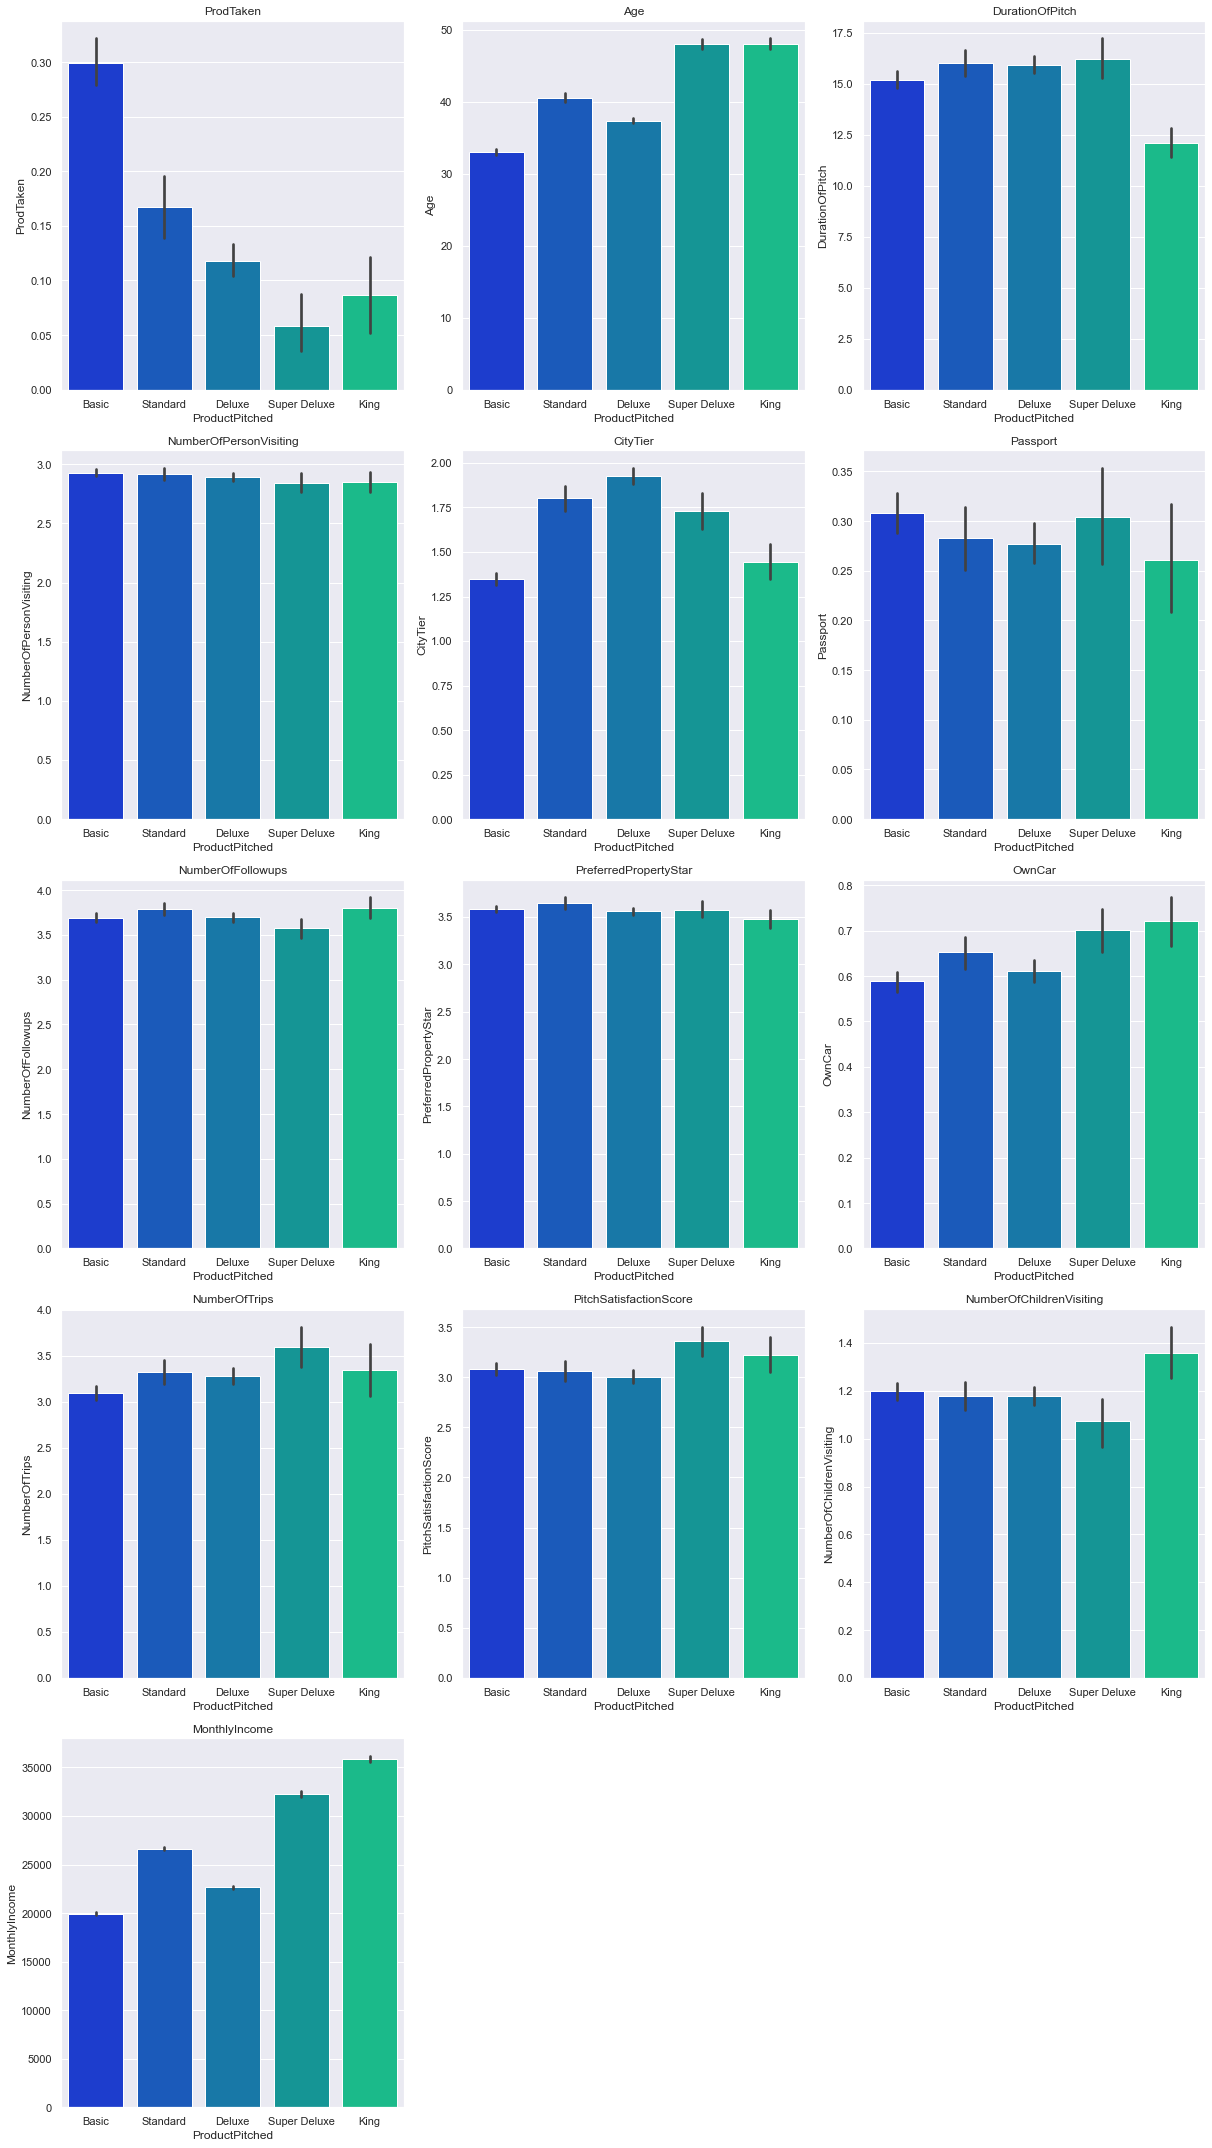

In [664]:
cols = data[
    [
        'ProdTaken','Age','DurationOfPitch','NumberOfPersonVisiting','CityTier', 'Passport','NumberOfFollowups', 'PreferredPropertyStar','OwnCar','NumberOfTrips','PitchSatisfactionScore','NumberOfChildrenVisiting','MonthlyIncome',
         ]
].columns.tolist()
plt.figure(figsize=(17,30 ))

for i, variable in enumerate(cols):
    plt.subplot(5, 3, i + 1)
    x_order = ["Basic","Standard", "Deluxe", "Super Deluxe", "King"]
    sns.barplot(data["ProductPitched"], data[variable], palette="winter", order = x_order)
    plt.tight_layout()
    plt.title(variable)
plt.show()

<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Basic is the most common package taken by customers.
2. Lower age group people prefer more Basic, Standard and Deluxe packages. As age increases , higher age group people are preferring Super Deluxe and King packages.
3. Duration of Pitch is lower for people going with King package as compared to other packages.
4. Number of person visiting and Preffered property has no significant impact on packages preferred by customers.
5. Customers taking King package need slightly more followups than customers taking other packages.
6. Super Deluxe and king customers  give higher pitch satisfaction score.
7. Customers with more children visiting, prefer more king packages.
8. Lower Income group prefer Basic, Standard, Deluxe, higher income group people prefer Super deluxe and king.

<font color=darkorange>
<font size =4.5>
1.6.5 Plotting a Stacked Bar Plot Correlation between ProdTaken and other Dependent paparameters

In [665]:
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, tour_bi["ProdTaken"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, tour_bi["ProdTaken"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    
    plt.show()

<font color=darkorange>
<font size =4.5>
1.6.5.1 Stacked Bar plot on Type of Contact

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2837  607  3444
All              3946  917  4863
------------------------------------------------------------------------------------------------------------------------


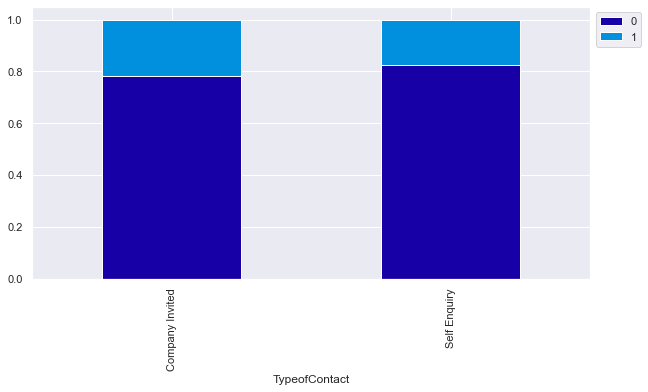

In [666]:
stacked_plot(tour_bi["TypeofContact"])

<font color=green>
<font size = 1>
# Observations :
Percentage of company invited customers taking the product is more than that of self invited.


<font color=darkorange>
<font size =4.5>
1.6.5.2 Stacked Bar plot on City Tier

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


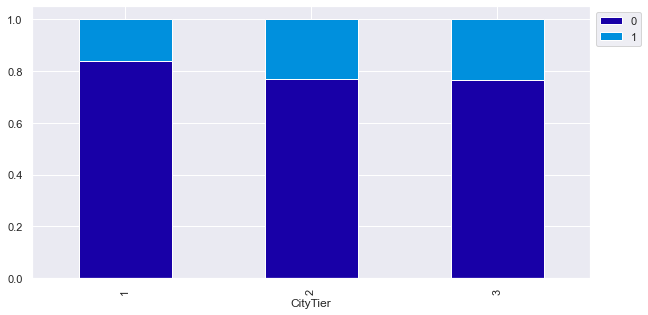

In [667]:
stacked_plot(tour_bi["CityTier"])

<font color=green>
<font size = 1>
# Observations :
Though Tier 1 has maximum customers of all the observations of Tier 2 and 3 city customers are more likely to take product.


<font color=darkorange>
<font size =4.5>
1.6.5.3 Stacked Bar plot on  binned Monthly Income

In [668]:
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, tour_bin1["ProdTaken"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, tour_bin1["ProdTaken"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ProdTaken           0.0  1.0   All
MonthlyIncome_bin                 
15K-20K             754  284  1038
20k-25K            2031  459  2490
25K-30K             651  117   768
30K-35K             343   39   382
35K and above       185   21   206
All                3964  920  4884
------------------------------------------------------------------------------------------------------------------------


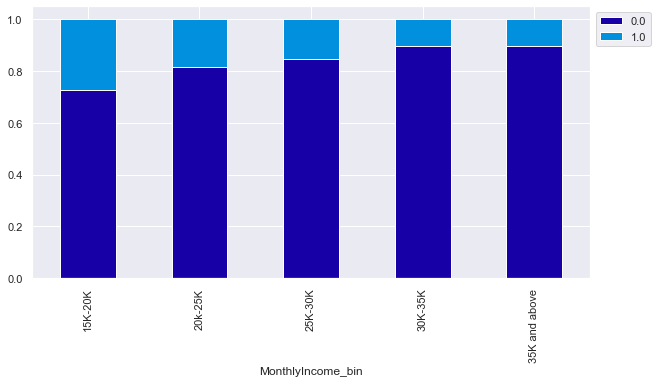

In [669]:
stacked_plot(tour_bin1["MonthlyIncome_bin"])

<font color=darkorange>
<font size =4.5>
1.6.5.4 Stacked Bar plot on Number of trips

ProdTaken       0.0  1.0   All
NumberOfTrips                 
1.0             507  112   619
2.0            1164  299  1463
3.0             862  217  1079
4.0             416   61   477
5.0             395   62   457
6.0             258   64   322
7.0             156   62   218
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
All            3836  908  4744
------------------------------------------------------------------------------------------------------------------------


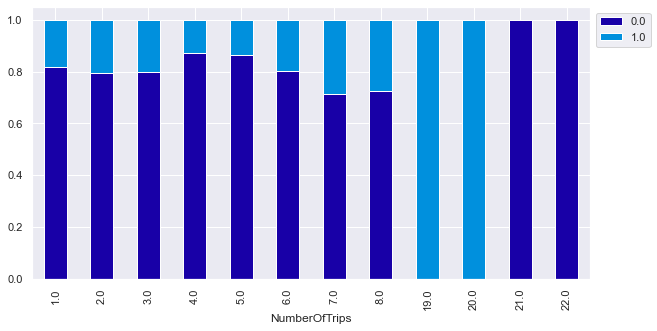

In [670]:
stacked_plot(tour_bi["NumberOfTrips"])

<font color=darkorange>
<font size =4.5>
1.6.5.4 Stacked Bar plot on Product Pitched

ProdTaken        0.0  1.0   All
ProductPitched                 
Basic           1288  552  1840
Deluxe          1526  204  1730
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3964  920  4884
------------------------------------------------------------------------------------------------------------------------


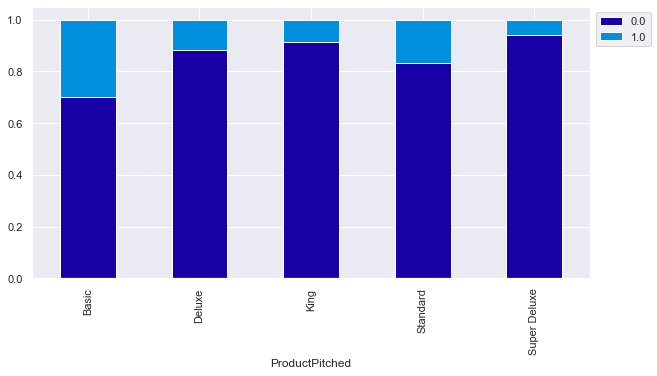

In [671]:
stacked_plot(tour_bi["ProductPitched"])

<font color=green>
<font size = 1>
# Observations :
Of all the products pitched the basic and standard packages were more prefered by customer.


<font color=darkorange>
<font size =4.5>
1.6.6 Observation on Customer Profile for different packages.

<font color=darkorange>
<font size =4.5>
1.6.6.1 Plotting a Stacked Bar Plot Correlation between Product Pitched and other Dependent paparameters

In [672]:
def stacked_plot1(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, tour_bi["ProductPitched"], margins=True)
#    print(tab1)
#    print("-" * 120)
    tab = pd.crosstab(x, tour_bi["ProductPitched"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
   # plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    
    plt.show()


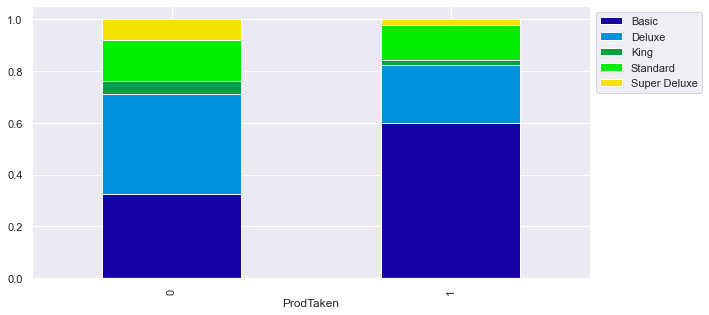

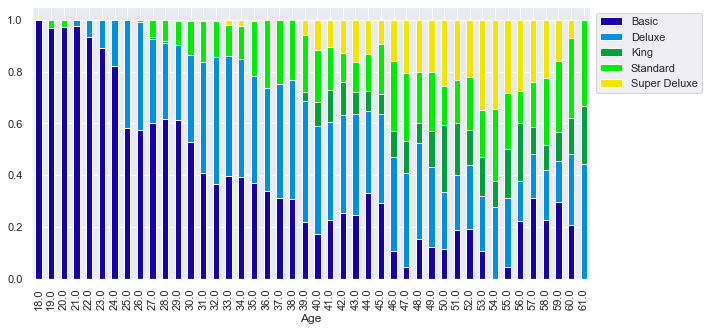

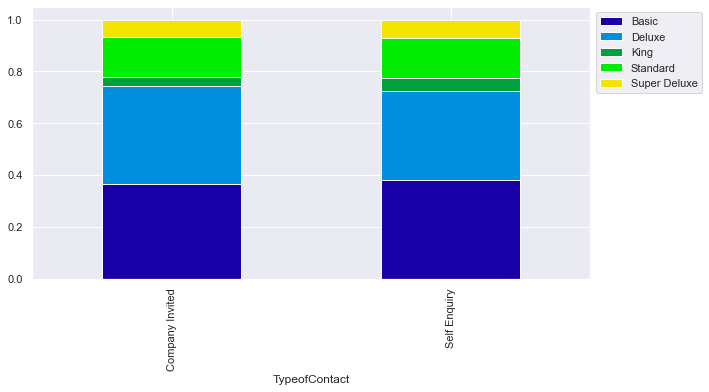

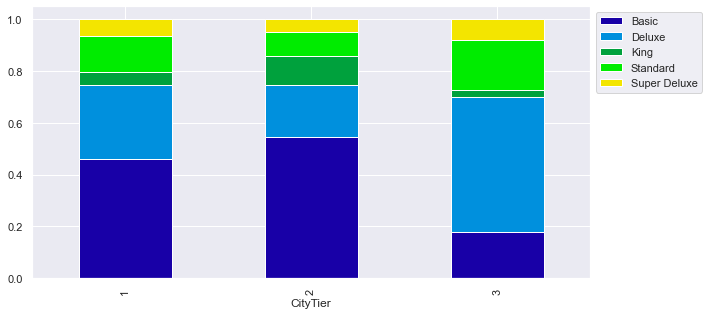

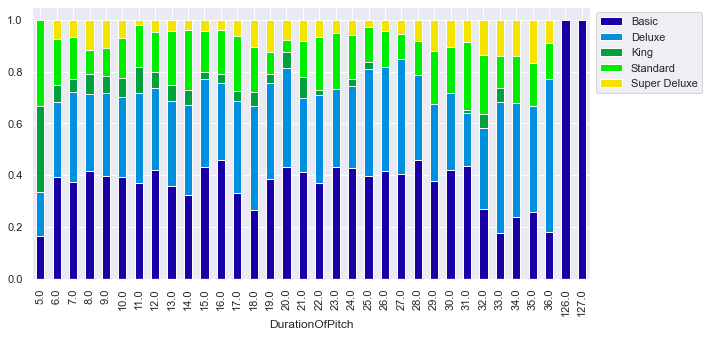

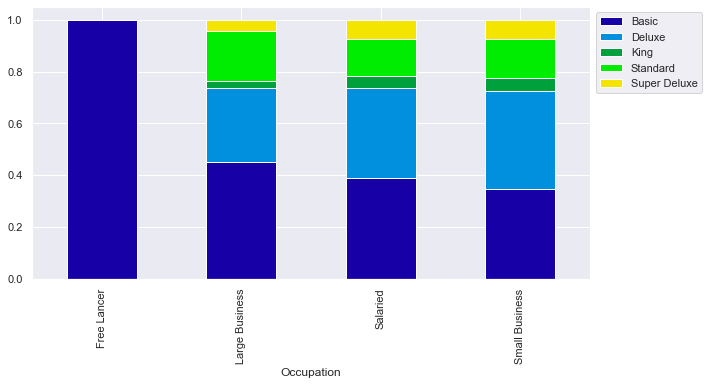

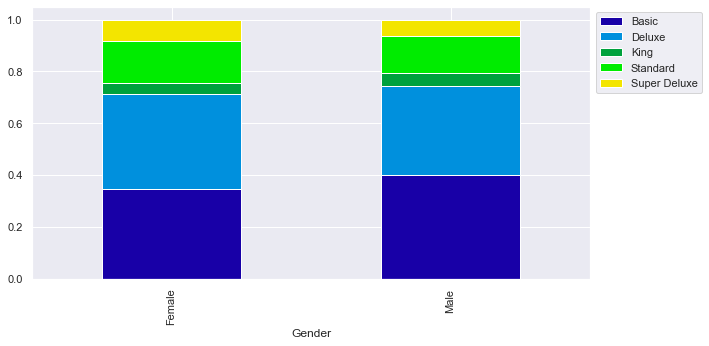

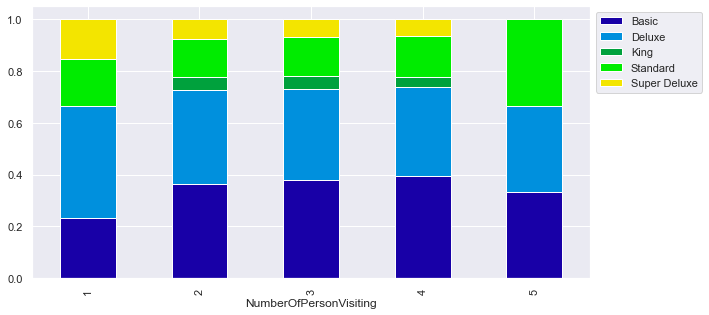

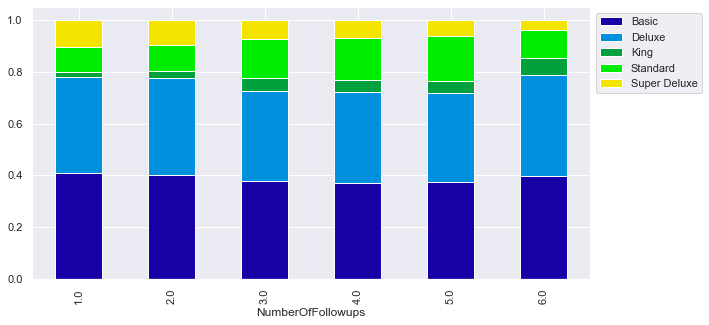

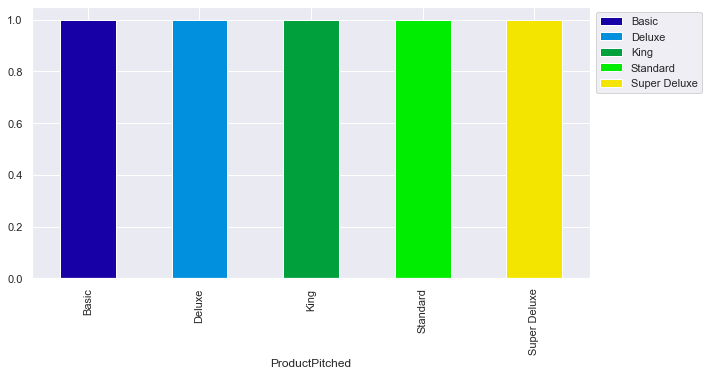

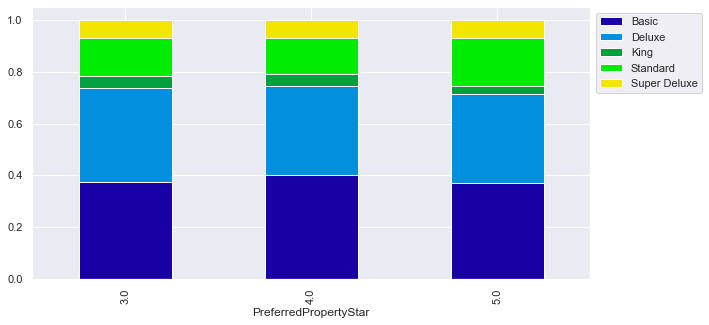

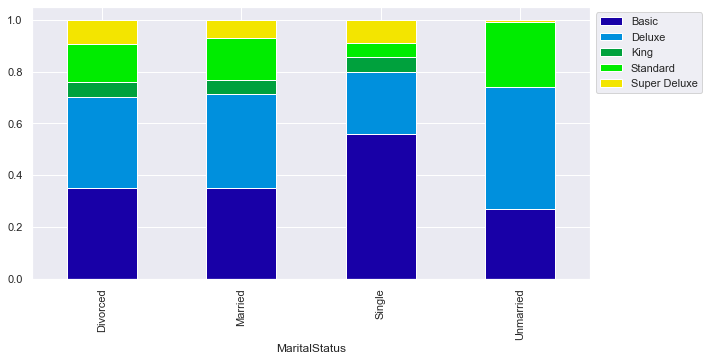

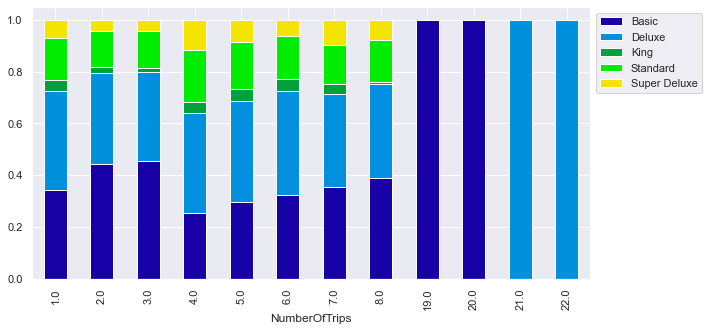

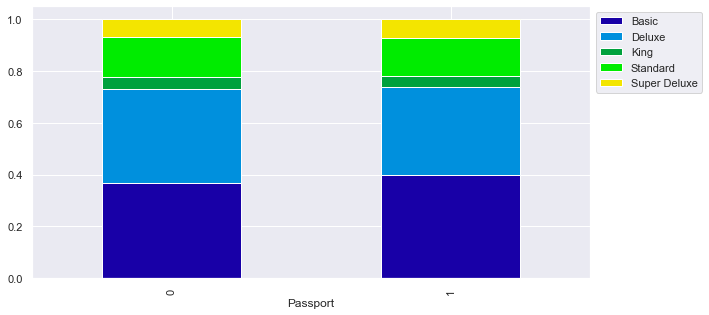

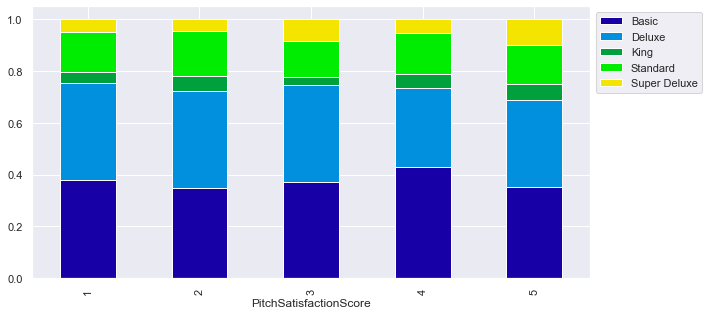

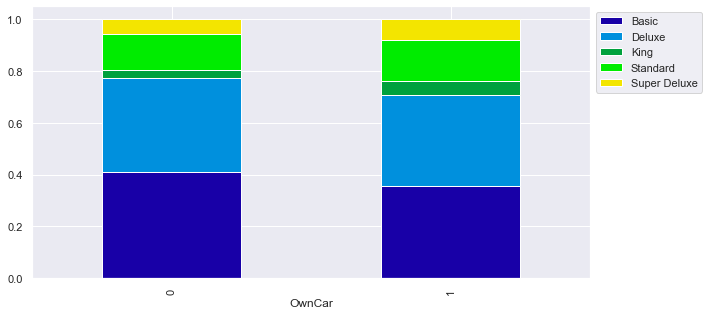

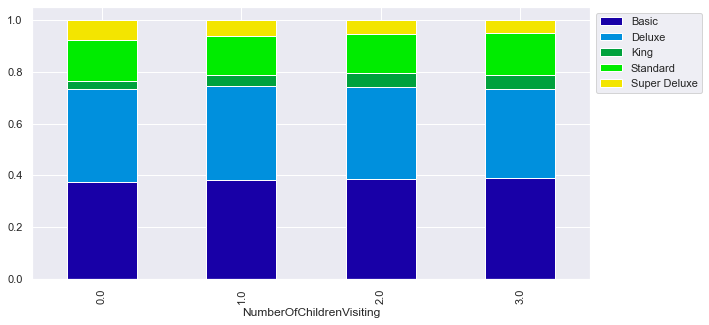

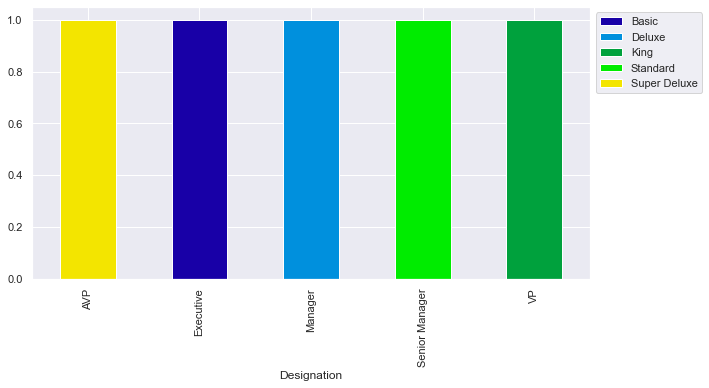

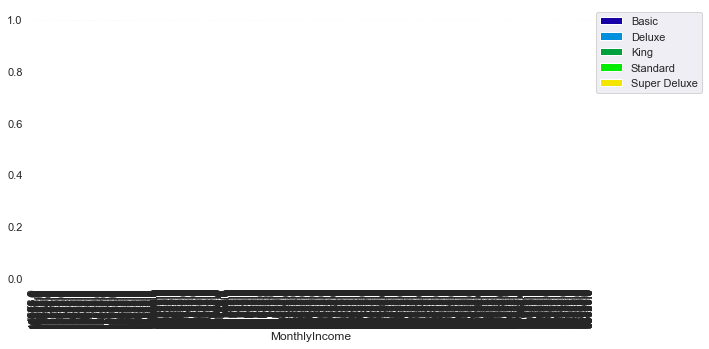

In [673]:

y= tour_bi.columns
for i in y:
    stacked_plot1(tour_bi[i])
  


<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Basic is the most common package taken by customers.
2. Lower age group people prefer more Basic, Standard and Deluxe packages. As age increases , higher age grroup people are preferring Super Deluxe and King packages.
3. Duration of Pitch is lower for people going with King package as compared to other packages.
4. Number of person visiting and Prefered property has no significant impact on packages preferred by customers.
5. Customers taking King package need slightly more followups than customers taking other packages.
6. Super Deluxe and king customers  give higher pitch statisfaction score.
7. Customers with more children visiting, prefer more king packages.
8. Lower Income group prefer Basic, Standard, Deluxe, higher income group people prefer Super deluxe and king.

<font color=darkorange>
<font size =4.5>
1.6.6.2 Count of Product pitched and product taken

In [674]:
f= tour_bi.groupby(['ProdTaken','ProductPitched']).size().reset_index(name ='count')
x = f.sort_values(['ProdTaken','count'],ascending=False).groupby('ProdTaken').head()
print(x)

  ProdTaken ProductPitched  count
5         1          Basic    552
6         1         Deluxe    204
8         1       Standard    124
7         1           King     20
9         1   Super Deluxe     20
1         0         Deluxe   1528
0         0          Basic   1290
3         0       Standard    618
4         0   Super Deluxe    322
2         0           King    210


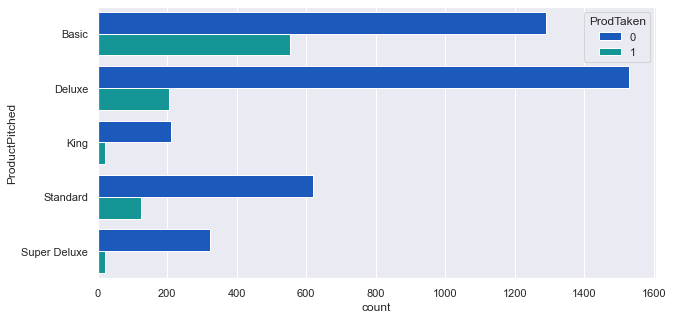

In [675]:
# Plotting graph for car sales city wise based on transmission
plt.figure(figsize=(10,5))
sns.barplot(data=x ,x='count',y='ProductPitched',hue='ProdTaken',palette ='winter')
plt.show()

<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Basic is the most popular package among customers.
2. King and Super Deluxe or least popular packages.

<font color=darkorange>
<font size =4.5>
1.6.6.3 Observation of effect of passport on Product Pitched and Prod Taken

In [676]:
f= tour_bi.groupby(['Passport','ProductPitched', 'ProdTaken']).size().reset_index(name ='count')
x = f.sort_values(['ProductPitched'],ascending=False).groupby('ProductPitched').head()
print(x)

   Passport ProductPitched ProdTaken  count
19        1   Super Deluxe         1     12
8         0   Super Deluxe         0    230
9         0   Super Deluxe         1      8
18        1   Super Deluxe         0     92
16        1       Standard         0    162
6         0       Standard         0    456
7         0       Standard         1     76
17        1       Standard         1     48
4         0           King         0    162
5         0           King         1      8
14        1           King         0     48
15        1           King         1     12
2         0         Deluxe         0   1148
3         0         Deluxe         1    104
12        1         Deluxe         0    380
13        1         Deluxe         1    100
0         0          Basic         0   1044
11        1          Basic         1    322
1         0          Basic         1    230
10        1          Basic         0    246


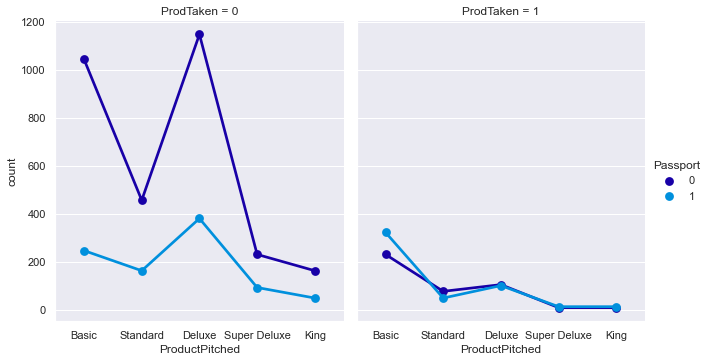

In [677]:
x_order = ["Basic","Standard", "Deluxe", "Super Deluxe", "King"]
ax = sns.catplot(x="ProductPitched", y="count", hue="Passport",
            col="ProdTaken", aspect=.9,
            kind="point", order = x_order, data=x)


<font color=Green>
<font size =1>
# Observations 
People with passport are more likely to take the packages offered. Customers without passport are less likely to take the packages offered.


<font color=darkorange>
<font size =4.5>
1.6.6.4 Observation of effect of passport on Product Pitched and Prod Taken

In [678]:
f= tour_bi.groupby(['CityTier','ProductPitched', 'ProdTaken']).size().reset_index(name ='count')
x = f.sort_values(['ProductPitched'],ascending=False).groupby('ProductPitched').head()
print(x)

    CityTier ProductPitched ProdTaken  count
29         3   Super Deluxe         1     16
28         3   Super Deluxe         0    104
8          1   Super Deluxe         0    208
9          1   Super Deluxe         1      4
19         2   Super Deluxe         1      0
16         2       Standard         0     10
27         3       Standard         1     64
26         3       Standard         0    224
6          1       Standard         0    384
7          1       Standard         1     52
25         3           King         1      8
24         3           King         0     32
15         2           King         1      0
14         2           King         0     22
5          1           King         1     12
13         2         Deluxe         1      0
12         2         Deluxe         0     40
22         3         Deluxe         0    640
23         3         Deluxe         1    144
3          1         Deluxe         1     60
1          1          Basic         1    392
11        

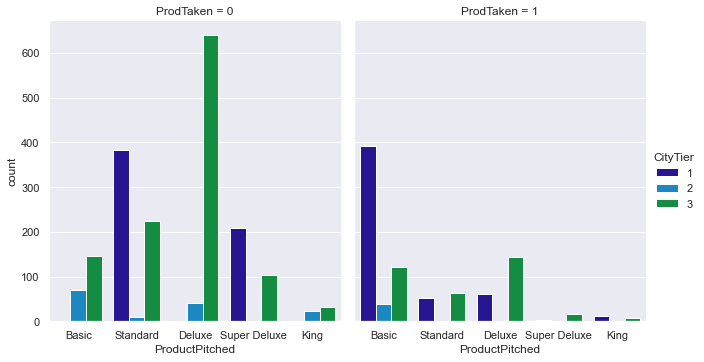

In [679]:
x_order = ["Basic","Standard", "Deluxe", "Super Deluxe", "King"]
ax = sns.catplot(x="ProductPitched", y="count", hue="CityTier",
            col="ProdTaken", aspect=.9,
            kind="bar", order = x_order, data=x)


<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Tier one city customers take more packages in general.
2. Tier 3 city customers prefer Deluxe and king packages more.
3. Tier 2 cities have shown least interest in packages. Mostly in only the basic package.
4. Overall Basic and Deluxe both packages seem popular with tier 1 and tier 3 cities.
5. Target customers in tier 1 cities more followed by tier 3 for marketing
    

<font color=darkorange>
<font size =4.5>
1.6.6.4 Observation of effect of Number of trips on Prod Taken

In [680]:
f= tour_bi.groupby(['NumberOfTrips', 'ProdTaken']).size().reset_index(name ='count')
x = f.sort_values(['ProdTaken'],ascending=False).groupby('ProdTaken').head()
print(x)

    NumberOfTrips ProdTaken  count
23           22.0         1      0
3             2.0         1    299
21           21.0         1      0
5             3.0         1    217
7             4.0         1     61
16           19.0         0      0
22           22.0         0      1
20           21.0         0      1
18           20.0         0      0
0             1.0         0    508


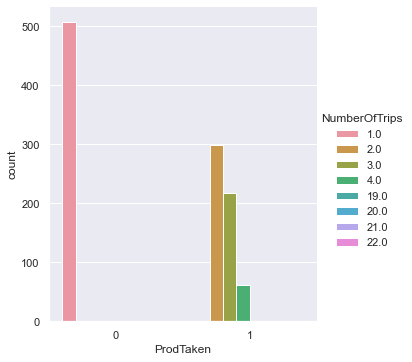

In [681]:
#x_order = ["Basic","Standard", "Deluxe", "Super Deluxe", "King"]
ax = sns.catplot(x="ProdTaken", y="count", hue="NumberOfTrips",
             aspect=.9,
            kind="bar", data=x)


<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Customers who take only one trip in a year are less likely to take a package as compared to people who take 2,3 or 4 trips in a year.2. people taking two trips a year are more likely to take a package.
    

<font color=darkorange>
<font size =4.5>
1.6.6.4 Observation of effect of Marital Status and gender on Prod Taken

In [682]:
f= tour_bi.groupby(['MaritalStatus', 'ProdTaken', 'Gender']).size().reset_index(name ='count')
x = f.sort_values(['ProdTaken'],ascending=False).groupby('ProdTaken').head()
print(x)

   MaritalStatus ProdTaken  Gender  count
2       Divorced         1  Female     48
3       Divorced         1    Male     76
6        Married         1  Female    110
7        Married         1    Male    216
10        Single         1  Female    113
0       Divorced         0  Female    338
1       Divorced         0    Male    488
4        Married         0  Female    786
5        Married         0    Male   1228
8         Single         0  Female    274


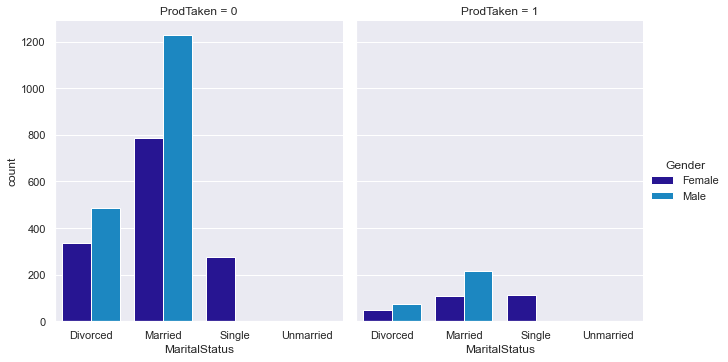

In [683]:
#x_order = ["Basic","Standard", "Deluxe", "Super Deluxe", "King"]
ax = sns.catplot(x="MaritalStatus", y="count", hue="Gender",
            col = 'ProdTaken' ,aspect=.9,
            kind="bar", data=x)


<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Unmarried customers are less likely to take packages.
2. single women are more likely to take packages as compared to single men
3. Married and Divorced more men are likely to take packages.
    

<font color=darkorange>
<font size =4.5>
1.6.6.4 Observation of effect of Occupation and Designation on Prod Taken

In [684]:
f= tour_bi.groupby(['Designation', 'ProdTaken', 'Occupation']).size().reset_index(name ='count')
x = f.sort_values(['Designation'],ascending=False).groupby('Designation').head()
print(x)

       Designation ProdTaken      Occupation  count
39              VP         1  Small Business     12
38              VP         1        Salaried      4
37              VP         1  Large Business      4
36              VP         1     Free Lancer      0
35              VP         0  Small Business     92
27  Senior Manager         0  Small Business    262
24  Senior Manager         0     Free Lancer      0
25  Senior Manager         0  Large Business     72
26  Senior Manager         0        Salaried    284
31  Senior Manager         1  Small Business     58
21         Manager         1  Large Business     16
23         Manager         1  Small Business    108
22         Manager         1        Salaried     80
20         Manager         1     Free Lancer      0
18         Manager         0        Salaried    738
10       Executive         0        Salaried    664
15       Executive         1  Small Business    202
14       Executive         1        Salaried    260
13       Exe

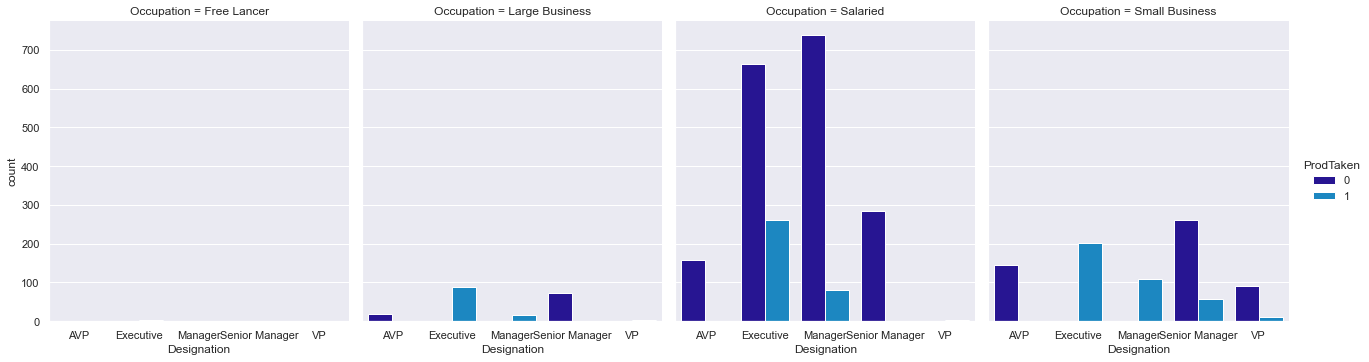

In [685]:
#x_order = ["Basic","Standard", "Deluxe", "Super Deluxe", "King"]
ax = sns.catplot(x="Designation", y="count", hue="ProdTaken",
            col = 'Occupation' ,aspect=.9,
            kind="bar", data=x)


<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Free Lancer occupation people are least likely to take packages.
2. In Large business occupation Executives and managers are only likely to take packages.
3. Same is the case with salaried only Executive and manager designation prefer packages.
4. In small business Executive, Manager, Senior manager as well as vp are likely to prefer packages.
    

<font color=darkorange>
<font size =4.5>
1.6.6.5 Observation of effect of Own Car on Product Pitched and Prod Taken

In [686]:
#Grouping data according to Own Car, Product Pitched and Product Taken.
f= tour_bi.groupby(['OwnCar','ProductPitched', 'ProdTaken']).size().reset_index(name ='count')
x = f.sort_values(['ProductPitched'],ascending=False).groupby('ProductPitched').head()
print(x)

   OwnCar ProductPitched ProdTaken  count
19      1   Super Deluxe         1     20
8       0   Super Deluxe         0    102
9       0   Super Deluxe         1      0
18      1   Super Deluxe         0    220
16      1       Standard         0    402
6       0       Standard         0    216
7       0       Standard         1     42
17      1       Standard         1     82
4       0           King         0     62
5       0           King         1      2
14      1           King         0    148
15      1           King         1     18
2       0         Deluxe         0    594
3       0         Deluxe         1     80
12      1         Deluxe         0    934
13      1         Deluxe         1    124
0       0          Basic         0    522
11      1          Basic         1    316
1       0          Basic         1    236
10      1          Basic         0    768


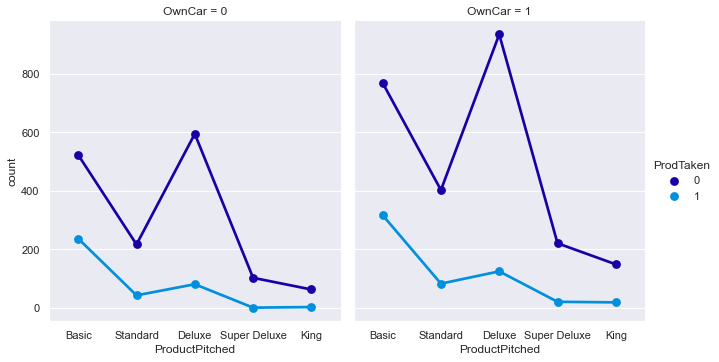

In [687]:
x_order = ["Basic","Standard", "Deluxe", "Super Deluxe", "King"]
ax = sns.catplot(x="ProductPitched", y="count", hue="ProdTaken",
            col="OwnCar", aspect=.9,
            kind="point", order = x_order, data=x)


<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. People with car are more interested in packages.
2. Basic Deluxe are the two most popular packages with people with car.
3. Target marketing to customers with car.

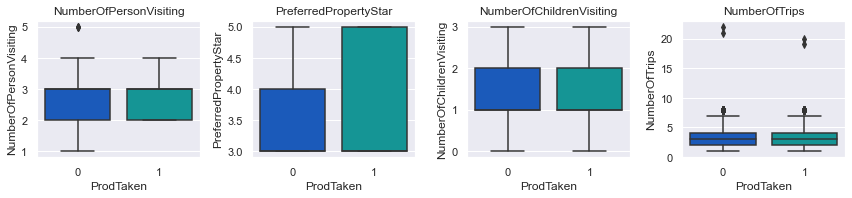

In [688]:
cols = tour_bi[['NumberOfPersonVisiting', 'PreferredPropertyStar', 'NumberOfChildrenVisiting','NumberOfTrips']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(2,4,i+1)
                     sns.boxplot(tour_bi['ProdTaken'],tour_bi[variable],palette="winter")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

<font color=darkcyan>
<font size =5>
1.7 Data Preprocessing

In [689]:
tour1 = tour.copy()# Making a copy so that we donot modify original data set

<font color=darkorange>
<font size =4.5>
1.7.1 Missing value treatment

<font color=green>
<font size = 1>
We have seen from initial analysis of data that there are a few data columns with missing data. These need to be identified, analyzed and appropriately missing value treatment techniques need to be implemented.


<font color=darkorange>
<font size =4.5>
1.7.1.1  Missing value detection

In [690]:
tour1.isnull().sum().sort_values(ascending=False)# Identifying  count of missing values on each column.

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Gender                        0
CityTier                      0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

<font color=darkorange>
<font size =4.5>
1.7.1.2  Replace missing values with NaN

In [691]:
# Replace missing values with NaN
 
tour1.replace(r'^\s*$', np.nan, regex=True)


,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


<font color=darkorange>
<font size =4.5>
1.7.1.3  Replace missing values in categorical column with "Unknown"

In [692]:
#1. Function to impute null value with new category
def impute_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])
## Call function to create new category for variables
impute_nan_create_category(tour1,'TypeofContact')
#2. Display result
tour1[['TypeofContact']].value_counts()

TypeofContact  
Self Enquiry       3444
Company Invited    1419
Unknown              25
dtype: int64

<font color=darkorange>
<font size =4.5>
1.7.1.4  Replace missing values with median

In [693]:
#Identifying median.
tour1.median()

Age                            36.0
CityTier                        1.0
DurationOfPitch                13.0
NumberOfPersonVisiting          3.0
NumberOfFollowups               4.0
PreferredPropertyStar           3.0
NumberOfTrips                   3.0
PitchSatisfactionScore          3.0
NumberOfChildrenVisiting        1.0
MonthlyIncome               22347.0
dtype: float64

In [694]:
# replace the missing values  in Duration of Pitch with median value.

tour1['DurationOfPitch'] = tour1['DurationOfPitch'].fillna(tour1['DurationOfPitch'].mean())
tour1.isnull().sum().sort_values(ascending=False)

MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
Gender                        0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

In [695]:
# replace the missing values  in Monthly Income with median value.

tour1['MonthlyIncome'] = tour1['MonthlyIncome'].fillna(tour1['MonthlyIncome'].mean())
tour1.isnull().sum().sort_values(ascending=False)

Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
MonthlyIncome                 0
Gender                        0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

In [696]:
# replace the missing values  in Age with median value.

tour1['Age'] = tour1['Age'].fillna(tour1['Age'].mean())
tour1.isnull().sum().sort_values(ascending=False)

NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
MonthlyIncome                 0
Gender                        0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

In [697]:
# replace the missing values  in Preferred Property Star with median value.

tour1['PreferredPropertyStar'] = tour1['PreferredPropertyStar'].fillna(tour1['PreferredPropertyStar'].mean())
tour1.isnull().sum().sort_values(ascending=False)

NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
MonthlyIncome                 0
NumberOfPersonVisiting        0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
ProductPitched                0
Designation                   0
PreferredPropertyStar         0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

In [698]:
# replace the missing values  in Number Of Trips  with median value.

tour1['NumberOfTrips'] = tour1['NumberOfTrips'].fillna(tour1['NumberOfTrips'].mean())
tour1.isnull().sum().sort_values(ascending=False)

NumberOfChildrenVisiting    66
NumberOfFollowups           45
MonthlyIncome                0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
ProductPitched               0
Designation                  0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
ProdTaken                    0
dtype: int64

<font color=darkorange>
<font size =4.5>
1.7.1.5  Replace missing values with Zero
    

In [699]:
# replace the missing values  in Number of Children visiting with Zero.
tour1["NumberOfChildrenVisiting"] = tour1["NumberOfChildrenVisiting"].fillna(0)
tour1.isnull().sum().sort_values(ascending=False)

NumberOfFollowups           45
MonthlyIncome                0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
ProductPitched               0
Designation                  0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
ProdTaken                    0
dtype: int64

In [700]:
# replace the missing values  in Number of Followups with Zero.
tour1["NumberOfFollowups"] = tour1["NumberOfFollowups"].fillna(0)
tour1.isnull().sum().sort_values(ascending=False)

MonthlyIncome               0
NumberOfFollowups           0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
ProductPitched              0
Designation                 0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
ProdTaken                   0
dtype: int64

<font color=darkorange>
<font size =4.5>
1.7.2 Outlier detection using box plot

In [701]:

tour1[['MonthlyIncome','Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting'] ]= tour1 [['MonthlyIncome','Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting']].astype('int64')

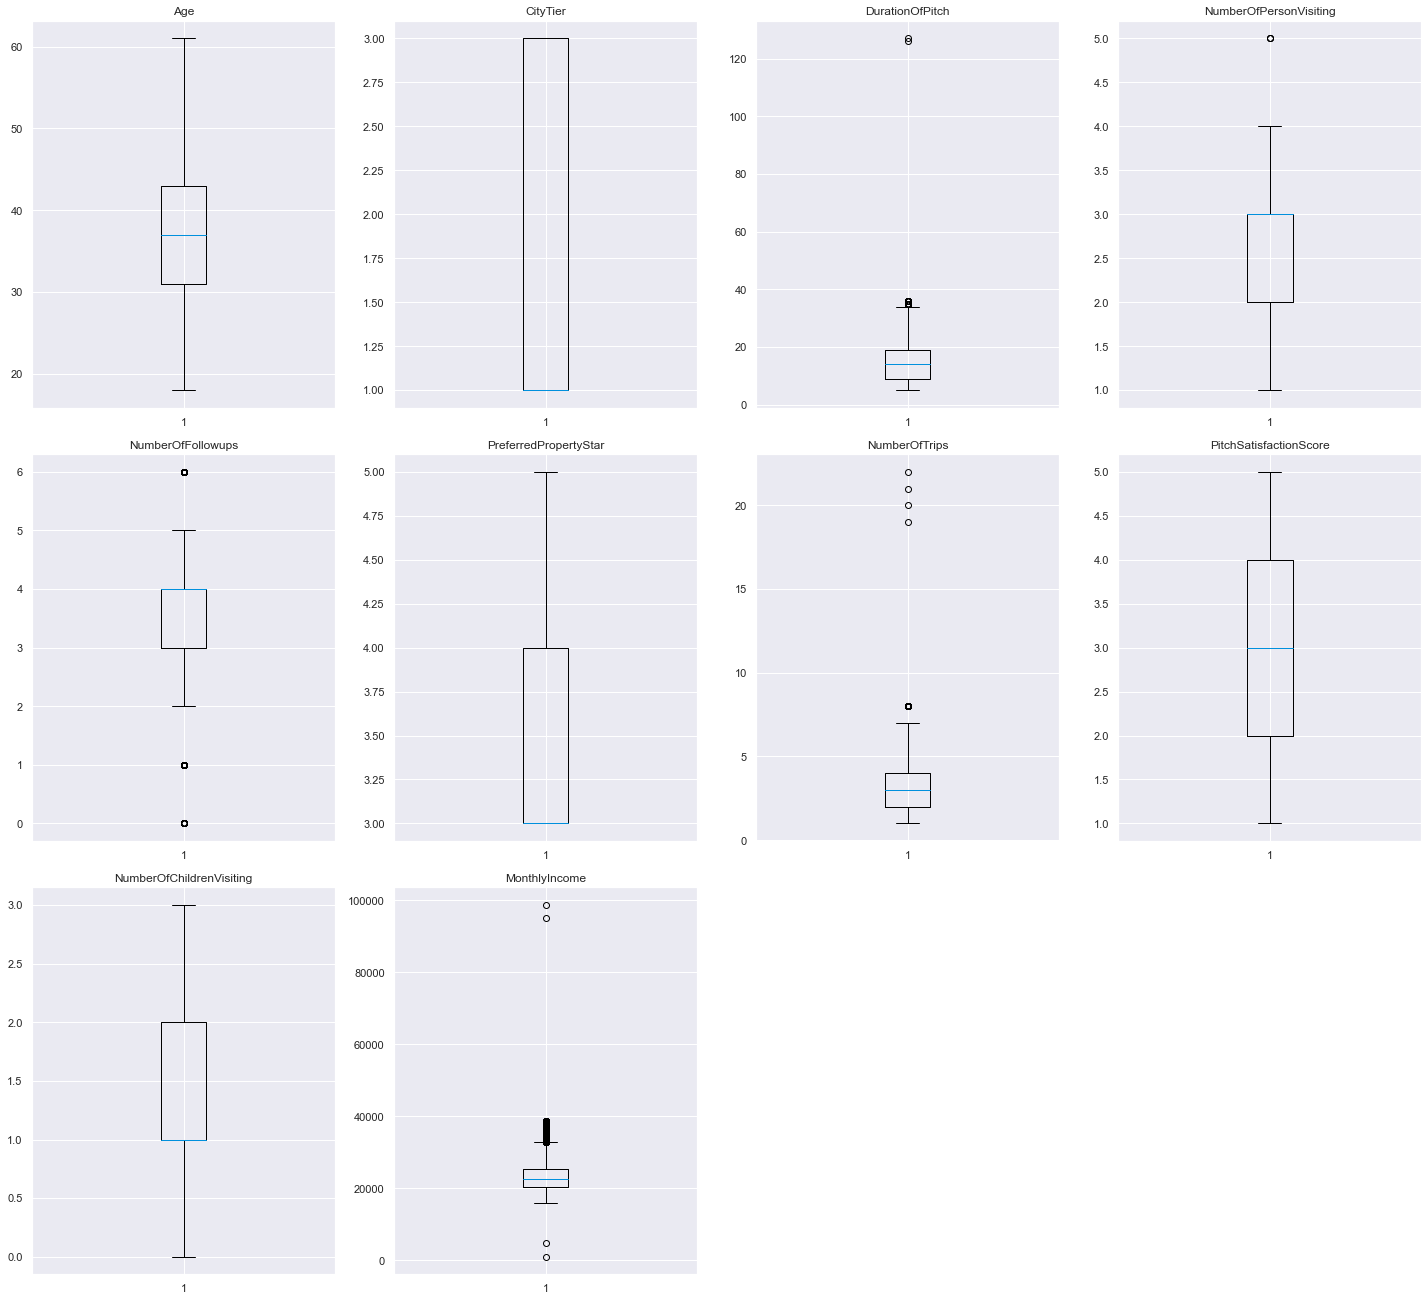

In [702]:
#numerical_col = ['Age','CityTier','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips','PitchSatisfactionScore','NumberOfChildrenVisiting','MonthlyIncome']

numerical_col = tour1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(tour1[variable])
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

1) Duration of Pitch, Number of Trips and Number of People visiting have upper outliers.
2) Number of follow ups and Monthly Income have both upper and lower outliers.


<font color=darkorange>
<font size =4.5>
1.7.2.1 Treating outliers

In [703]:
tour_out = tour1.copy()

In [704]:
def treat_outliers(tour_out,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=tour_out[col].quantile(0.25) # 25th quantile
    Q3=tour_out[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    tour_out[col] = np.clip(tour_out[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return tour_out

def treat_outliers_all(tour_out, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        tour_out = treat_outliers(tour_out,c)
        
    return tour_out

In [705]:
col = ["DurationOfPitch", "NumberOfTrips"]
# treating outliers
col = [ele for ele in col] 
tour_out= treat_outliers_all(tour_out,col)

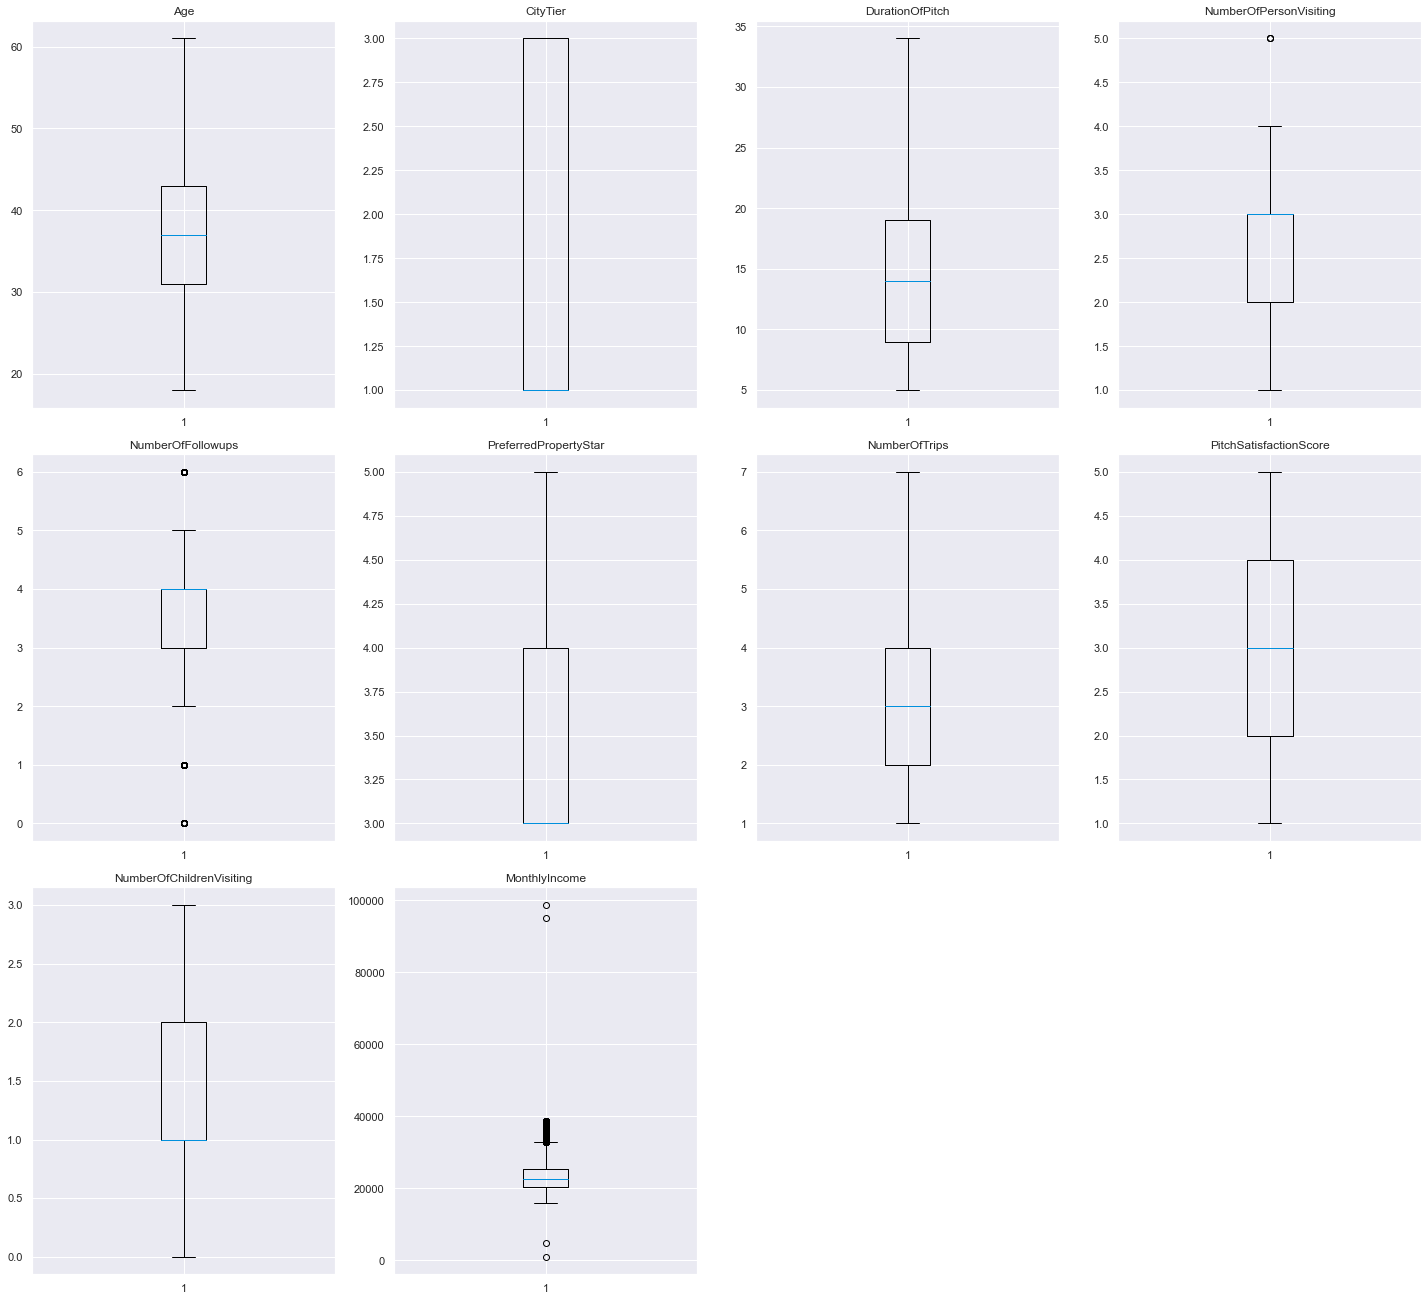

In [706]:
numerical_col = tour_out.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(tour_out[variable])
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

<font color=green>
<font size =2>
# Observations 


<font color = 'green'>

1) We Treated outliers in Duration Of Pitch and number which seemed incorrect values. 
2) Monthly income will be binned for better representation.
3) We will leave rest of the outliers as they are.


<font color=darkcyan>
<font size =5>
1.8 Model Building - Data Preparation

<font color=darkorange>
<font size =4.5>
1.8.1 Split the Data

In [707]:
tour_m1 =tour_out.copy()


In [708]:
X = tour_m1.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = tour_m1['ProdTaken']

In [709]:
X

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_Unknown,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_1,OwnCar_1,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41,3,6,3,3,3,1,2,0,20993,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0
1,49,1,14,3,4,4,2,3,2,20130,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0
2,37,1,8,3,4,3,7,3,0,17090,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0
3,33,1,9,2,3,3,2,5,1,17909,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0
4,37,1,8,2,3,4,1,5,0,18468,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49,3,9,3,5,4,2,1,1,26576,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,0,0
4884,28,1,31,4,5,3,3,3,2,21212,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0
4885,52,3,17,4,4,4,7,1,3,31820,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4886,19,3,16,3,4,3,3,5,2,20289,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [710]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 29) (1467, 29)


<font color=darkorange>
<font size =4.5>
1.8.2 Check the split of data

In [711]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(tour_m1.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(tour_m1.index)) * 100))

69.99% data is in training set
30.01% data is in test set


<font color=darkorange>
<font size =4.5>
1.8.3 Check Personal Loan True/False ratio in split data 

In [712]:
print("Original Package purchased True Values    : {0} ({1:0.2f}%)".format(len(tour_m1.loc[tour_m1['ProdTaken'] == 1]), (len(tour_m1.loc[tour_m1['ProdTaken'] == 1])/len(tour_m1.index)) * 100))
print("Original Package purchased False Values   : {0} ({1:0.2f}%)".format(len(tour_m1.loc[tour_m1['ProdTaken'] == 0]), (len(tour_m1.loc[tour_m1['ProdTaken'] == 0])/len(tour_m1.index)) * 100))
print("")
print("Training Package purchased True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Package purchased False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Package purchased True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Package purchased False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Package purchased True Values    : 920 (18.82%)
Original Package purchased False Values   : 3968 (81.18%)

Training Package purchased True Values    : 644 (18.82%)
Training Package purchased False Values   : 2777 (81.18%)

Test Package purchased True Values        : 276 (18.81%)
Test Package purchased False Values       : 1191 (81.19%)



<font color=darkorange>
<font size =4.5>
1.8.4 Check Percentage of Split Data

In [713]:
print('Shape of Training set : ',X_train.shape )
print('Shape of test set : ',X_test.shape )
print('Percentage of classes in training set:\n',y_train.value_counts(normalize=True))
print('Percentage of classes in test set:\n',y_test.value_counts(normalize=True))

Shape of Training set :  (3421, 29)
Shape of test set :  (1467, 29)
Percentage of classes in training set:
 0    0.811751
1    0.188249
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
 0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64


In [714]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [715]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

<font color=darkorange>
<font size =4.5>
1.8.6 Functions for model Performance metrics

In [716]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [717]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [718]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [719]:
##  Function to calculate accuracy score
def get_f1_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    
    d = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    d.append(train_f1) # adding train precision to list
    d.append(test_f1) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("f1 Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("f1 Score on test set : ",metrics.f1_score(y_test,pred_test))

    return d # returning the list with train and test scores

   

In [720]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [721]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [722]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<font color=darkcyan>
<font size =5>
1.9 Model Building - Model evaluation criterion

<font color = 'green'>

### Model can make wrong predictions as:
1. Predicting a customer will take Travel package and the customer doesn't take it
2. Predicting a customer will not take travel package and customer does take it

### Which case is more important? 
* Predicting that customer will take when they don't take packages causes more marketing cost, hence increases expenditure on marketing. i.e False Positive. And `Precision` needs to be increased to reduce False positive.
* Predicting that customer will not take package but he takes i.e. losing on a valuable customer, hence a revenue loss for the company. i.e False Negative. hence we need to improve `recall` to balance for this.


### How to reduce this loss i.e need to reduce False Negatives?
* Company wants to reduce marketing cost to make the marketing expenditure more efficient. In order to do that we need to improve precision but at the same time we cannnot lose valuable revenue of a potential customer. Hence we need to find a balance between Recall and precision.Both `Recall` and `Precision` are important for a good predictive model. Hence we need to find a balance between the two i.e a good `f1 score` along with `Precision` and `recall`


<font color=darkcyan>
<font size =5>
1.10 Model Building - Bagging

<font color=darkorange>
<font size =4.5>
1.10.1 Build Decision Tree Model

In [723]:
#Fitting the model
dtree = DecisionTreeClassifier(criterion='gini',random_state=1)

In [724]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

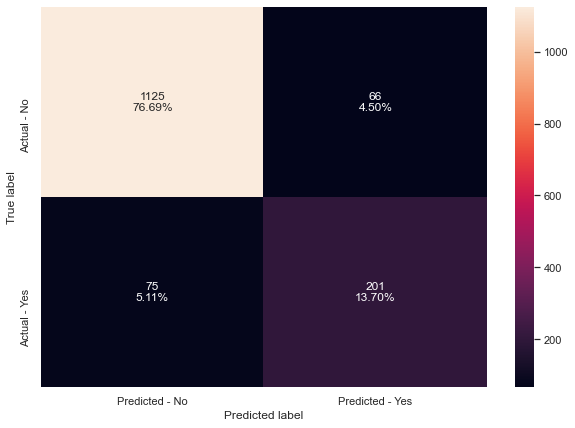

In [725]:
#Creating confusion matrix
make_confusion_matrix(dtree,y_test)

In [726]:
#Calculating different metrics
dtree_acc = get_accuracy_score(dtree)
dtree_recall = get_recall_score(dtree)
dtree_precision = get_precision_score(dtree)
dtree_f1 =get_f1_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.9038854805725971
Recall on training set :  1.0
Recall on test set :  0.7282608695652174
Precision on training set :  1.0
Precision on test set :  0.7528089887640449
f1 Score on training set :  1.0
f1 Score on test set :  0.7403314917127071


<font color = 'green'>

###Observation on metrics and Confusion Matrix




<font color = 'green'>

1. Decision tree Model is definitely overfitting on training data.
2. Recall , Precision , f1 score are around 70 %, 74 %, 72% respectively.
3. We can try hyperparameter and weighted class models for performance evaluation and check the performance of the model.

<font color=darkorange>
<font size =4.5>
1.10.2 Build Bagging Classifier Model

In [727]:
#Fitting the model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

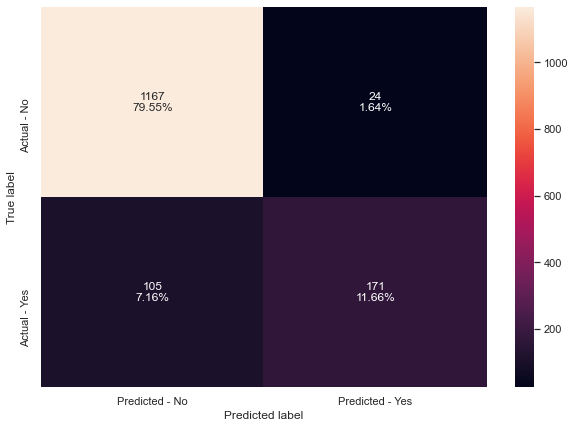

In [728]:
#Creating confusion matrix
make_confusion_matrix(bagging,y_test)

In [729]:
#Calculating different metrics
bagging_acc = get_accuracy_score(bagging)
bagging_recall = get_recall_score(bagging)
bagging_precision = get_precision_score(bagging)
bagging_f1 = get_f1_score(bagging)

Accuracy on training set :  0.9938614440222158
Accuracy on test set :  0.9120654396728016
Recall on training set :  0.968944099378882
Recall on test set :  0.6195652173913043
Precision on training set :  0.9984
Precision on test set :  0.8769230769230769
f1 Score on training set :  0.983451536643026
f1 Score on test set :  0.7261146496815286


<font color = 'green'>

###Observation on metrics and Confusion Matrix




<font color = 'green'>

1. Bagging classifier is overfiiting the training data.
2. Recall is very low on test data.
3. We can try hyperparameter and weighted class models for performance evaluation and check the performance of the model.

<font color=darkorange>
<font size =4.5>
1.10.3 Build Random Forest Model

In [730]:
#Fitting the model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

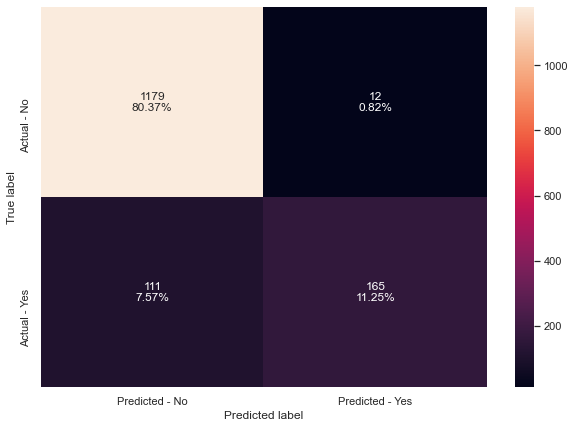

In [731]:
#Calculating different metrics
make_confusion_matrix(rf,y_test)

In [732]:
#Creating confusion matrix
rf_acc = get_accuracy_score(rf)
rf_recall = get_recall_score(rf)
rf_precision = get_precision_score(rf)
rf_f1 = get_f1_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9161554192229039
Recall on training set :  1.0
Recall on test set :  0.5978260869565217
Precision on training set :  1.0
Precision on test set :  0.9322033898305084
f1 Score on training set :  1.0
f1 Score on test set :  0.728476821192053


<font color = 'green'>

Observation on metrics and Confusion Matrix




<font color = 'green'>

1. Random Forest model is overfiiting the training data.
2. Recall is very low on test data again aroun 60%.
3. We can try hyperparameter and weighted class models for improving recall and check the performance of the model.

<font color=darkcyan>
<font size =5>
1.11 Model Performance Improvement - Bagging

<font color=darkorange>
<font size =4.5>
1.11.1  Hyperparameter tuning - Weighted Class Models

<font color = 'green'>

We pass a dictionary {0:2,1:0.8} to the model to specify the weight of each class and the decision tree will give more weightage to class 1. class_weight is a hyperparameter for the decision tree classifier.




<font color=darkorange>
<font size =4.5>
1.11.1.1 Build model with Weighted decision tree

In [733]:
#Fitting the model
dtree_wt = DecisionTreeClassifier(criterion='gini',random_state=1, class_weight={0:0.2,1:0.8})

In [734]:
dtree_wt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

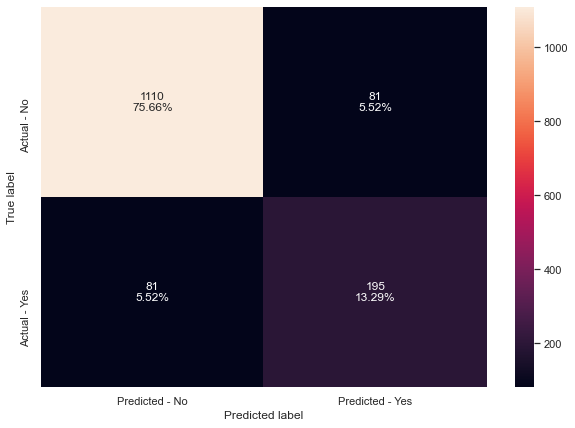

In [735]:
#Creating confusion matrix
make_confusion_matrix(dtree_wt,y_test)

In [736]:
#Calculating different metrics
wt_dtree_acc = get_accuracy_score(dtree_wt)
wt_dtree_recall = get_recall_score(dtree_wt)
wt_dtree_precision = get_precision_score(dtree_wt)
wt_dtree_f1 =get_f1_score(dtree_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.8895705521472392
Recall on training set :  1.0
Recall on test set :  0.7065217391304348
Precision on training set :  1.0
Precision on test set :  0.7065217391304348
f1 Score on training set :  1.0
f1 Score on test set :  0.7065217391304348


<font color = 'green'>


Observation on metrics and Confusion Matrix




<font color = 'green'>

1. Weighted Decision tree Model is definitely overfitting on training data.
2. Recall , Precision , f1 score are reduced as compared to previous decision tree model.
3. We can try hyperparameter and weighted class models for performance evaluation and check the performance of the model.

<font color=darkorange>
<font size =4.5>
1.11.1.2 Build Bagging Classifier with weighted decision tree

In [737]:
#Fitting the model

bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.2,1:0.8},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        random_state=1),
                  random_state=1)

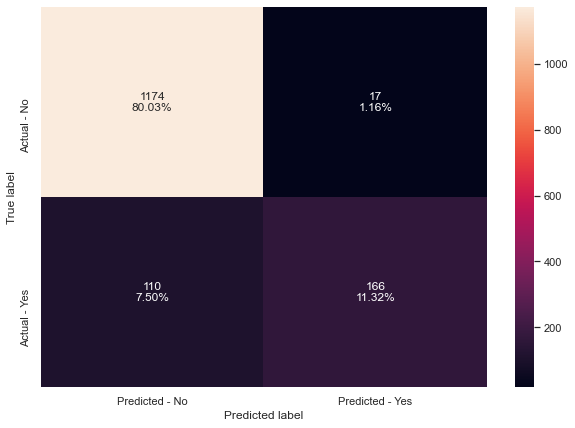

In [738]:
#Creating confusion matrix
make_confusion_matrix(bagging_wt,y_test)

In [739]:
#Calculating different metrics
wt_bagging_acc = get_accuracy_score(bagging_wt)
wt_bagging_recall = get_recall_score(bagging_wt)
wt_bagging_precision = get_precision_score(bagging_wt)
wt_bagging_f1 = get_f1_score(bagging_wt)

Accuracy on training set :  0.994153756211634
Accuracy on test set :  0.9134287661895024
Recall on training set :  0.9736024844720497
Recall on test set :  0.6014492753623188
Precision on training set :  0.9952380952380953
Precision on test set :  0.907103825136612
f1 Score on training set :  0.9843014128728415
f1 Score on test set :  0.7233115468409586


<font color = 'green'>

Observation on metrics and Confusion Matrix




<font color = 'green'>

1. Bagging classifier with weighted decion tree is doing good on Accuracy and Precision.
2. But performing very bad on Recall and f1 score.
3. Using weighted model has not resulted any significant improvement for the model. Hence will be required to try other tuning methods.

<font color=darkorange>
<font size =4.5>
1.11.1.3 Build Random forest with class weights

In [740]:
#Fitting the model
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

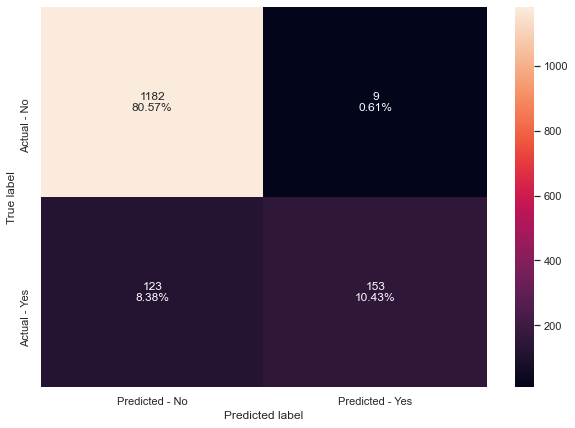

In [741]:
#Creating confusion matrix
make_confusion_matrix(rf_wt,y_test)

In [742]:
#Calculating different metrics
wt_rf_acc = get_accuracy_score(rf_wt)
wt_rf_recall = get_recall_score(rf_wt)
wt_rf_precision = get_precision_score(rf_wt)
wt_rf_f1 = get_f1_score(rf_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.9100204498977505
Recall on training set :  1.0
Recall on test set :  0.5543478260869565
Precision on training set :  1.0
Precision on test set :  0.9444444444444444
f1 Score on training set :  1.0
f1 Score on test set :  0.6986301369863014


<font color = 'green'>


Observation on metrics and Confusion Matrix




<font color = 'green'>

1. Weighted random forest is overfitting training data it is doing good on Accuracy and Precision.
2. But performing very bad on Recall and f1 score.
3. Using weighted model has not resulted any significant improvement for the model. Hence will be required to try other tuning methods.

<font color=darkorange>
<font size =4.5>
1.11.2  Hyperparameter tuning - Using GridSearch

<font color = 'green'>
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

<font color=darkorange>
<font size =4.5>
1.11.2.1 Tuning Decision Tree

In [743]:
from sklearn.model_selection import GridSearchCV

In [744]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.17,1:0.83},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2,3,5, 10,15,20],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=5,
                       max_leaf_nodes=20, min_impurity_decrease=0.001,
                       random_state=1)

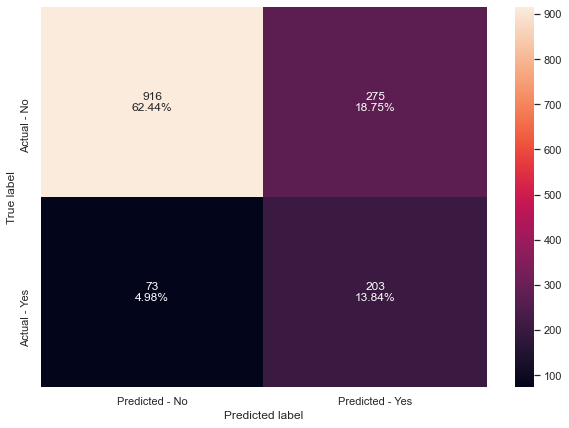

In [745]:
make_confusion_matrix(dtree_estimator,y_test)

In [746]:
tuned_dtree_acc = get_accuracy_score(dtree_estimator)
tuned_dtree_recall = get_recall_score(dtree_estimator)
tuned_dtree_precision = get_precision_score(dtree_estimator)
tuned_dtree_f1 = get_f1_score(dtree_estimator)

Accuracy on training set :  0.7746273019584917
Accuracy on test set :  0.7627811860940695
Recall on training set :  0.7391304347826086
Recall on test set :  0.7355072463768116
Precision on training set :  0.4411492122335496
Precision on test set :  0.4246861924686193
f1 Score on training set :  0.5525246662797446
f1 Score on test set :  0.5384615384615384


<font color = 'green'>

Observation on metrics and Confusion Matrix




<font color = 'green'>

1. Over fitting in decision tree has reduced .
2. But performing very bad on Precision and f1 score.

    

<font color=darkorange>
<font size =4.5>
1.11.2.2 Tuning Bagging Classifier

In [747]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.13,1:0.87},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'f1', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.13,
                                                                                 1: 0.87},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='f1')

In [748]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.13,
                                                                      1: 0.87},
                                                        random_state=1),
                  max_features=0.8, n_estimators=51, random_state=1)

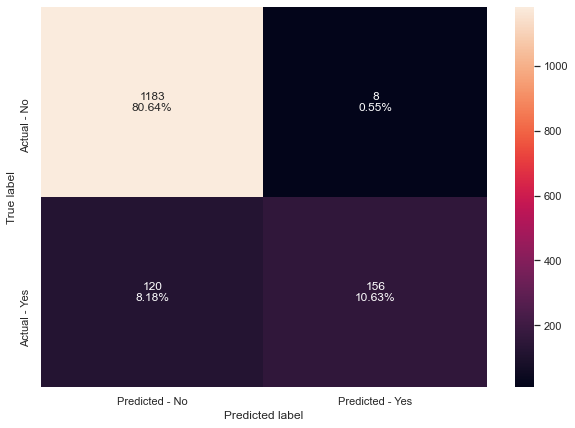

In [749]:
make_confusion_matrix(bagging_estimator,y_test)

In [750]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)
tuned_bagging_recall = get_recall_score(bagging_estimator)
tuned_bagging_precision = get_precision_score(bagging_estimator)
tuned_bagging_f1 = get_f1_score(bagging_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.912747102931152
Recall on training set :  1.0
Recall on test set :  0.5652173913043478
Precision on training set :  1.0
Precision on test set :  0.9512195121951219
f1 Score on training set :  1.0
f1 Score on test set :  0.7090909090909091


<font color = 'green'>

Observation on metrics and Confusion Matrix




<font color = 'green'>

1. Over fitting in training data .
2. Performing poorly on Recall.


<font color=darkorange>
<font size =4.5>
1.11.2.2 Tuning Random Forest

In [751]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=20,
                       max_features=None, min_samples_split=7, n_estimators=80,
                       oob_score=True, random_state=1)

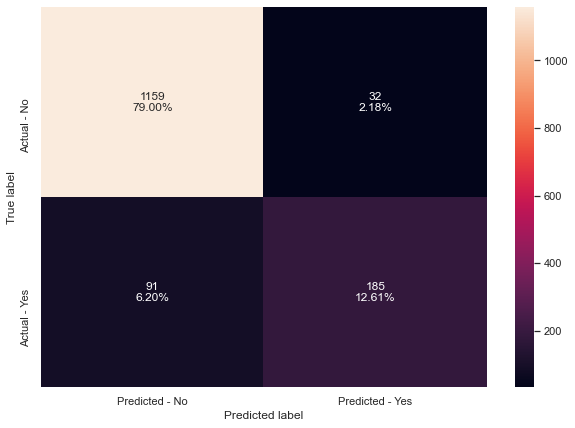

In [752]:
make_confusion_matrix(rf_estimator,y_test)

In [753]:
tuned_rf_acc = get_accuracy_score(rf_estimator)
tuned_rf_recall = get_recall_score(rf_estimator)
tuned_rf_precision = get_precision_score(rf_estimator)
tuned_rf_f1 = get_f1_score(rf_estimator)

Accuracy on training set :  0.9959076293481438
Accuracy on test set :  0.9161554192229039
Recall on training set :  0.9984472049689441
Recall on test set :  0.6702898550724637
Precision on training set :  0.9801829268292683
Precision on test set :  0.8525345622119815
f1 Score on training set :  0.9892307692307692
f1 Score on test set :  0.7505070993914807


<font color = 'green'>

Observation on metrics and Confusion Matrix




<font color = 'green'>

1. Tuned random forest has shown some improvement in recall than previous models.
2. Also overfitting has reduced slightly.


<font color=darkcyan>
<font size =5>
1.12 Model Building - Bagging - Comparing all the models

In [754]:
# defining list of models
models = [dtree,dtree_wt,dtree_estimator,bagging,bagging_wt,bagging_estimator,rf,rf_wt,rf_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train =[]
f1_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    # f1 score
    m = get_f1_score(model,False)
    f1_train.append(m[0])
    f1_test.append(m[1])

In [755]:
comparison_frame1 = pd.DataFrame({'Model':['Decision Tree','Weighted Decision tree','Tuned Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_f1_score': f1_train,
                                          'Test_f1_score': f1_test}) 
comparison_frame1

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_f1_score,Test_f1_score
0,Decision Tree,1.000000,0.903885,1.000000,0.728261,1.000000,0.752809,1.000000,0.740331
1,Weighted Decision tree,1.000000,0.889571,1.000000,0.706522,1.000000,0.706522,1.000000,0.706522
2,Tuned Decision Tree,0.774627,0.762781,0.739130,0.735507,0.441149,0.424686,0.552525,0.538462
3,Bagging Classifier,0.993861,0.912065,0.968944,0.619565,0.998400,0.876923,0.983452,0.726115
4,Weighted Bagging Classifier,0.994154,0.913429,0.973602,0.601449,0.995238,0.907104,0.984301,0.723312
5,Tuned Bagging Classifier,1.000000,0.912747,1.000000,0.565217,1.000000,0.951220,1.000000,0.709091
6,Random Forest,1.000000,0.916155,1.000000,0.597826,1.000000,0.932203,1.000000,0.728477
7,Weighted Random Forest,1.000000,0.910020,1.000000,0.554348,1.000000,0.944444,1.000000,0.698630
8,Tuned Random Forest,0.995908,0.916155,0.998447,0.670290,0.980183,0.852535,0.989231,0.750507


<font color = 'green'>

* Decision tree : overfitting training data, Tuned decision tree slightly reduces overfitting. But performance on precision and f1 score is poor.
* Bagging classifier overfitted the data before and after tuning. Performing poorly on recall parameter.
* Random Forest: Tuned random forest is slightly better than other models. Slightly less overfitting and improvement in all performance metrics as compared to other models.

<font color=darkcyan>
<font size =5>
1.14 Model Building - Boosting

<font color=darkorange>
<font size =4.5>
1.14.1 AdaBoost Classifier

Accuracy on training set :  0.8421514177141187
Accuracy on test set :  0.8466257668711656
Recall on training set :  0.31832298136645965
Recall on test set :  0.322463768115942
Precision on training set :  0.6699346405228758
Precision on test set :  0.7007874015748031
F1-Score on training set :  0.43157894736842106
F1-Score on test set :  0.44168734491315137


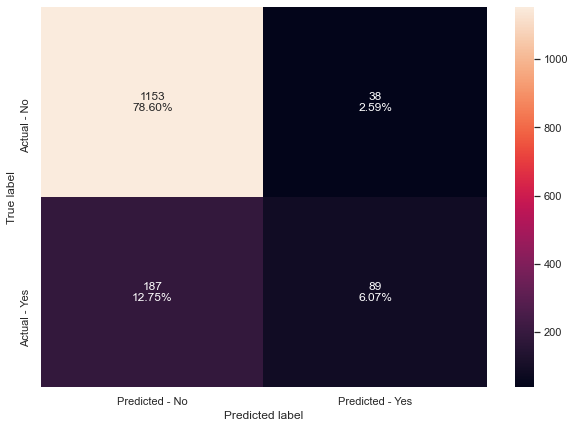

In [756]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

<font color = 'green'>

Observation on metrics and Confusion Matrix




<font color = 'green'>

1. AdaBoost classifier  has avoided overfitting the model.
2. Precision and Accuracy are good, but recall and f1 score are very poor.
3. Hypertuning parameters can help with better overall performance.


<font color=darkorange>
<font size =4.5>
1.14.2 Hyperparameter Tuning - AdaBoost Classifier

<font color = 'green'>

Hypertuning Adabooster by trying different max depth for base estimator ,  n estimators, and learning rate 

base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    
n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    
learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.


In [761]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": [np.arange(10,110)],
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100, random_state=1)

Accuracy on training set :  0.9903536977491961
Accuracy on test set :  0.8847989093387867
Recall on training set :  0.9627329192546584
Recall on test set :  0.6159420289855072
Precision on training set :  0.985691573926868
Precision on test set :  0.7296137339055794
F1-Score on training set :  0.974076983503535
F1-Score on test set :  0.6679764243614931


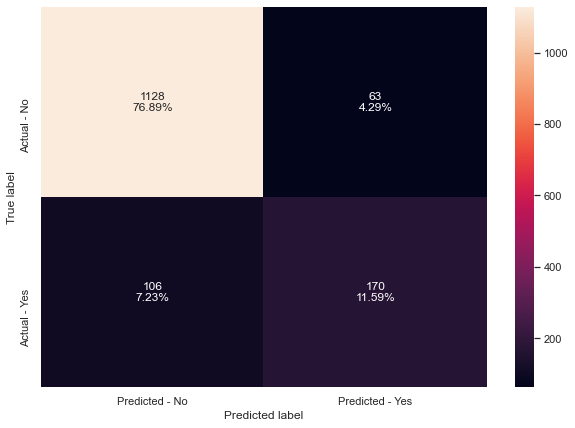

In [762]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

<font color = 'green'>

Observation on metrics and Confusion Matrix




<font color = 'green'>

1.Hypertuning the above parameters in Adaboost classifier has increased overfitting of training data.
    
    
2.But has given a slightly improved model over the previous overall.


<font color=darkorange>
<font size =4.5>
 Feature Importance of AdaBoost Classifier

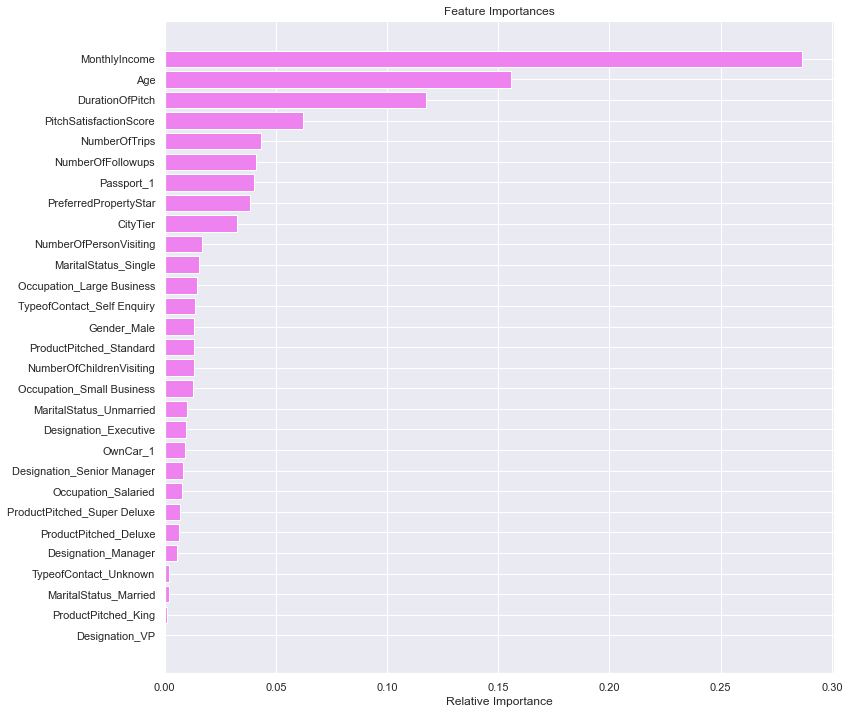

In [763]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<font color = 'green'>

Monthly Income is the most important feature in tuned Adaboost Classifier.




<font color=darkorange>
<font size =4.5>
1.14.3 Gradient Boosting Classifier

Accuracy on training set :  0.887459807073955
Accuracy on test set :  0.8677573278800272
Recall on training set :  0.46273291925465837
Recall on test set :  0.39855072463768115
Precision on training set :  0.884272997032641
Precision on test set :  0.7971014492753623
F1-Score on training set :  0.6075433231396534
F1-Score on test set :  0.5314009661835749


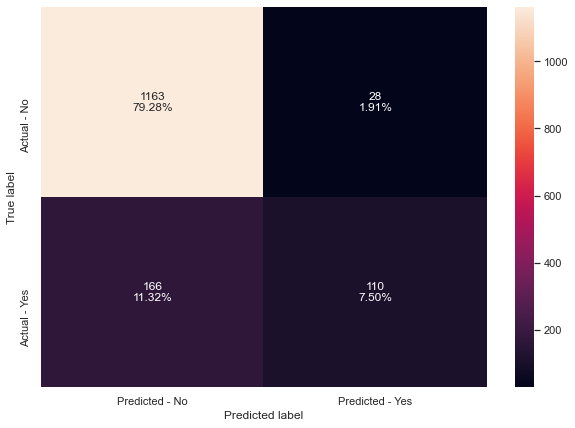

In [764]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

<font color = 'green'>

Observation on metrics and Confusion Matrix




<font color = 'green'>

1. Gradient boost classifier  has avoided overfitting the model.
2. Precision and Accuracy are good, but recall is very poor and f1 score also is slightly low.
3. Hypertuning parameters can help with better overall performance.


<font color=darkorange>
<font size =4.5>
1.14.4 Hyperparameter Tuning - Gradient Boosting Classifier

<font color = 'green'>

Hypertuning Gradient Boosting Classifier by trying different subsample ,  n estimators, and max_features 




In [765]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.9)

Accuracy on training set :  0.9237065185618241
Accuracy on test set :  0.8875255623721882
Recall on training set :  0.6288819875776398
Recall on test set :  0.5036231884057971
Precision on training set :  0.9484777517564403
Precision on test set :  0.8323353293413174
F1-Score on training set :  0.7563025210084033
F1-Score on test set :  0.6275395033860046


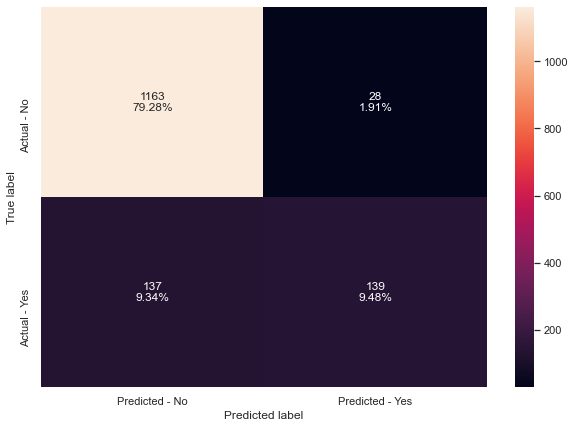

In [766]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

<font color = 'green'>

Observation on metrics and Confusion Matrix




<font color = 'green'>

1. Tuned Gradient boost Classifier has a slightly increased Recall. Rest of the performance metrics are considerably good.


<font color=darkorange>
<font size =4.5>
 Feature Importance of Gradient Boost Classifier

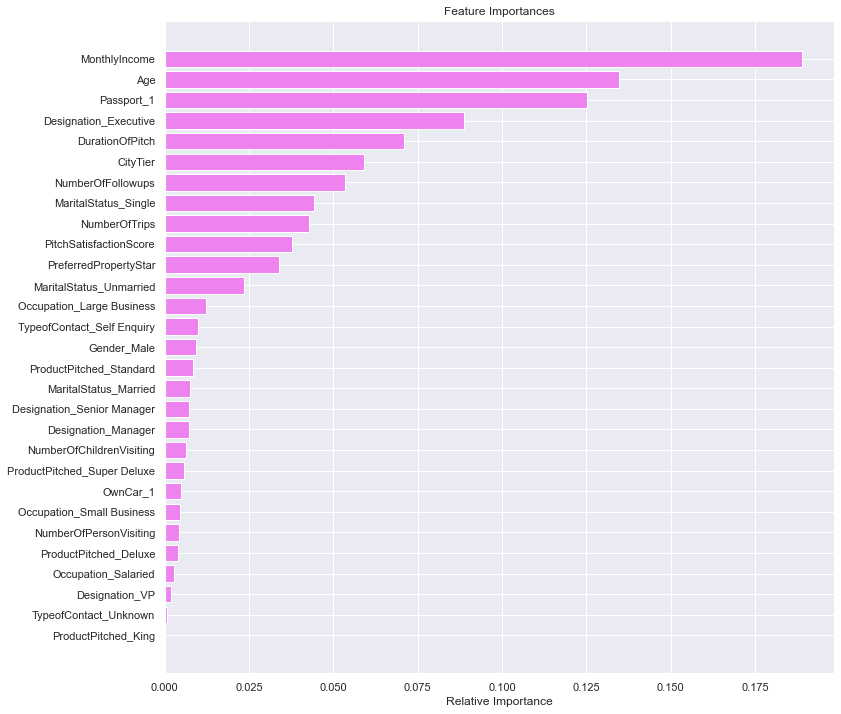

In [767]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<font color = 'green'>

Monthly Income is the most important feature in tuned gradient boost classifier.




<font color=darkorange>
<font size =4.5>
1.14.4 XGBoost Classifier

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.918200408997955
Recall on training set :  0.9984472049689441
Recall on test set :  0.677536231884058
Precision on training set :  1.0
Precision on test set :  0.8577981651376146
F1-Score on training set :  0.9992229992229993
F1-Score on test set :  0.7570850202429149


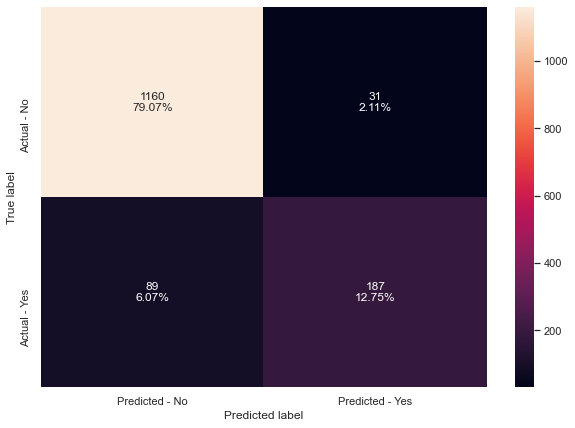

In [768]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

<font color = 'green'>

Observation on metrics and Confusion Matrix




<font color = 'green'>

1. XGBoost is overfitting training data in the model.
2. Large difference between test and training Accuracy.
3. Hypertuning parameters can help with better overall performance.


<font color=darkorange>
<font size =4.5>
1.14.5 Hyperparameter Tuning - XGBoost Classifier

<font color = 'green'>

Hypertuning XGBoost by trying different parameters given below
- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.



In [769]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.9777842736042093
Accuracy on test set :  0.9045671438309475
Recall on training set :  0.9922360248447205
Recall on test set :  0.7934782608695652
Precision on training set :  0.9
Precision on test set :  0.7251655629139073
F1-Score on training set :  0.9438700147710487
F1-Score on test set :  0.7577854671280277


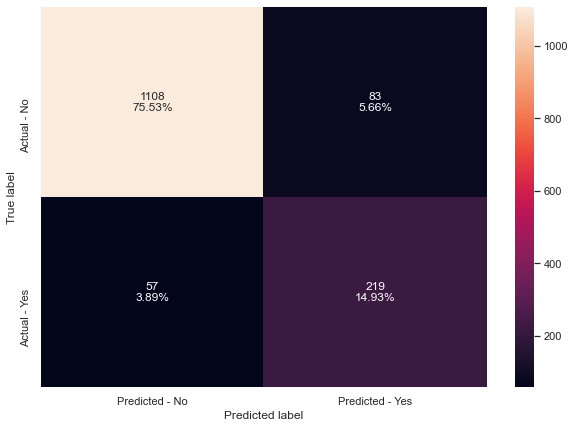

In [770]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

<font color = 'green'>

Observation on metrics and Confusion Matrix




<font color = 'green'>

1. Tuned XGBoost is the best model performance we have seen till now.
2. There is reduced overfitting of data.
3. All performance metrics are above 75%. Which shows an overall better performance.

<font color=darkorange>
<font size =4.5>
1.14.6 Feature importance of tuned XGBoost Classifier

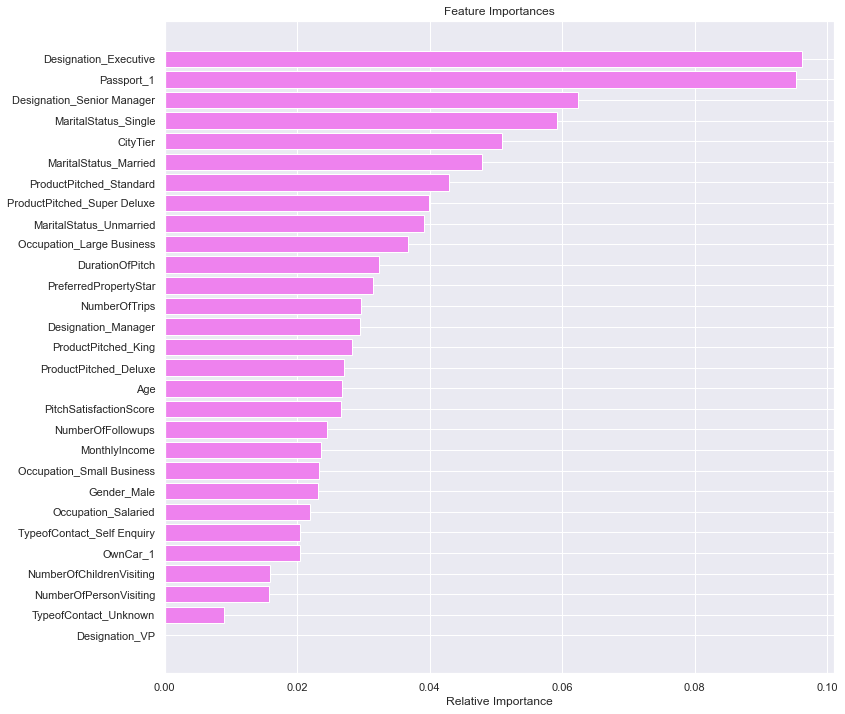

In [771]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<font color = 'green'>

Passport and Designation are the most important features in XGBoost Classifier.




<font color=darkorange>
<font size =4.5>
1.14.6 Stacking Classifier

In [772]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=25,
                                                       max_features=None,
                                                       min_samples_split=7,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=250,
                                                           random_state=1,
                                                 

Accuracy on training set :  0.9766150248465361
Accuracy on test set :  0.8950238582140423
Recall on training set :  0.9984472049689441
Recall on test set :  0.8260869565217391
Precision on training set :  0.8905817174515236
Precision on test set :  0.6826347305389222
F1-Score on training set :  0.9414348462664714
F1-Score on test set :  0.7475409836065575


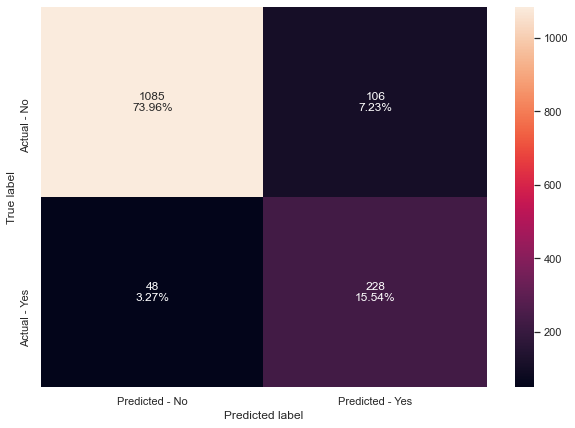

In [773]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

<font color = 'green'>

Observation on metrics and Confusion Matrix




<font color = 'green'>

1. Stacking classifier is slightly overfitting.
2. Low precision and f1 score


<font color=darkcyan>
<font size =5>
1.15 Model Building - Boosting - Comparing all the models

In [774]:
# defining list of models
models = [
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [775]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
0,AdaBoost Classifier,0.842151,0.846626,0.318323,0.322464,0.669935,0.700787,0.431579,0.441687
1,Tuned AdaBoost Classifier,0.990354,0.884799,0.962733,0.615942,0.985692,0.729614,0.974077,0.667976
2,Gradient Boosting Classifier,0.887460,0.867757,0.462733,0.398551,0.884273,0.797101,0.607543,0.531401
3,Tuned Gradient Boosting Classifier,0.923707,0.887526,0.628882,0.503623,0.948478,0.832335,0.756303,0.627540
4,XGBoost Classifier,0.999708,0.918200,0.998447,0.677536,1.000000,0.857798,0.999223,0.757085
5,Tuned XGBoost Classifier,0.977784,0.904567,0.992236,0.793478,0.900000,0.725166,0.943870,0.757785
6,Stacking Classifier,0.976615,0.895024,0.998447,0.826087,0.890582,0.682635,0.941435,0.747541


<font color = 'green'>

* AdaBoost classifier :  avoided overfitting the model. Precision and accuracy are good but recall and f1 score are very poor
*  Gradient boost classifier  has avoided overfitting the model.No significant impact of tuning.poor performance on recall.
* Tuned XGBoost is the best model performance we have seen till now. There is reduced overfitting of data. All performance metrics are above 75%. Which shows an overall better performance.

<font color=darkcyan>
<font size =5>
Conclusion

### <a id='link1'> Summary of EDA</a>

<font color = 'black'>
Key Observations

1) Age
    * Age roughly varies from 18 to 62.
    * Age group of 30 to 40 has maximum customers.    
2) Monthly income
    * Maximum customers with income group 15K to 25K monthly.
    *
3) Duration of Pitch
    * Maximum Duration of Pitch is 10- 20.

4) Type of contact :70.5% of contact type are Self Enquiry.

5) City Tier : Tier 1 cities have most purchases i.e 65.3% followed by tier 3 cities at 30.7%.

6) Gender: Most purchases are by male customers with 59.7% .

7) Number of Person Visiting: Most common traveling group are for 3 people with customer.

8) Prefered property star : Most commonly preferred property is with star rating of 3.

9) Marital Status : 47.9% Married customers. Most customers are married.

10) Number of trips: 30% of customers take two trips per year and 22.1 % take three trips.

11) Passport: 70.9% of customers don’t have passports.

12) Own Car 62% of customers own a car.

13) Number of Children visiting : 42% of customers are traveling with one child.
    
14)Designation: 
    * 37% of people hold a designation of executive and 
    * 35% hold a designation of manager in their respective current organizations.

15) Pitch Satisfaction Score : 30% of customers have given a pitch satisfaction score of '3'.

16) Product Pitched : Most product pitched by sales person is Basic and Deluxe package with 37.7% and 35.4% respectively

17) Number of followups : Mostly salesperson made 3 or 4 followups after their pitch.

18) Monthly Income: 15k -20k is the maximum customer income group.


    
Key Variables correlating 


1. There is a considerable correlation between number of children visiting and number of person visiting.
2. Number of followups has a slight correlation to number of person visiting
3. Monthly income and age has a correlation
4. Customers in lower age group are more likely to take product package.
5. More the duration of the pitch more chances of product package being taken.
6. Higher the pitch satisfaction score, more followups and higher preferred star rating  increases the chances of product taken.
7. People with passport are more likely to take the packages offered. Customers without passport are less likely to take the packages offered.
8. Owning a car or no car does not have any significant  impact on taking a package.
9. Basic is the most common package taken by customers.   
10. Percentage of company invited customers taking the product is more than that of self invited.
11. Though Tier 1 has maximum customers of all the observations of Tier 2 and 3 city customers are more likely to take product.
12. Of all the products pitched the basic and standard packages were more preferred by customer.
13. Customers who take only one trip in a year are less likely to take a package as compared to people who take 2,3 or 4 trips in a year.Customer taking two trips a year are more likely to take a package.
14. Unmarried customers are less likely to take packages.Single women are more likely to take packages as compared to single men. Married and Divorced more men are likely to take packages.
15.Free Lancer occupation people are least likely to take packages.In Large business occupation Executives and managers are only likely to take packages.Same is the case with salaried only Executive and manager designation prefer packages. In small business Executive, Manager, Senior manager as well as vp are likely to prefer packages.

    
Customer Profile for different packages 
    

1. Lower age group people prefer more Basic, Standard and Deluxe packages. As age increases , higher age group people are preferring Super Deluxe and King packages.
2. Duration of Pitch is lower for people going with King package as compared to other packages.
3. Number of person visiting and Preferred property has no significant impact on packages preferred by customers.
4. Customers taking King package need slightly more followups than customers taking other packages.
5. Super Deluxe and king customers  give higher pitch satisfaction score.
6. Customers with more children visiting, prefer more king packages.
7. Lower Income group prefer Basic, Standard, Deluxe, higher income group people prefer Super deluxe and king. 
8. Basic is the most popular package among customers.
9. King and Super Deluxe or least popular packages.
10. Tier one city customers take more packages in general.
11. Tier 3 city customers prefer Deluxe and king packages more.
12. Tier 2 cities have shown least interest in packages. Mostly in only the basic package.
13. Overall Basic and Deluxe both packages seem popular with tier 1 and tier 3 cities.
14. Target customers in tier 1 cities more followed by tier 3 for marketing 
15. People with car are more interested in packages.
16. Basic Deluxe are the two most popular packages with people with car.
17. Target marketing to customers with car.

### <a id='link1'>Insights and Recommendations to marketing team</a>

<font color = 'black'>

Characteristics of a customer or Potential marketing base

1) Marketing to Customers with lower age group in range 30-40 are is more profitable.

2) Customers having a passport are more likely to take packages offered.
    
3) Company invited customers are more likely to take packages than self enquiry group of customers. Hence marketing team should target maximum customers in the given profile range.

4) Marketing in Tier one cities will be more profitable.
    
5) Single Women and married people are more likely customers. Hence they should be our target market base.

6) Customers travelling with children are more likely to take packages.

7) Customers with salaried and business occupation with designation manager or executive should be marketed to more.

8) Marketing to customers with mothly income 15k-20k will have more chances.
  

### <a id='link1'>Comparision between all the models </a>

In [776]:
# defining list of models
models = [dtree,dtree_wt,dtree_estimator,bagging,bagging_wt,bagging_estimator,rf,rf_wt,rf_estimator,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [778]:
comparison_frame3 = pd.DataFrame({'Model':['Decision Tree','Weighted Decision tree','Tuned Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame3.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
14,Tuned XGBoost Classifier,0.977784,0.904567,0.992236,0.793478,0.900000,0.725166,0.943870,0.757785
13,XGBoost Classifier,0.999708,0.918200,0.998447,0.677536,1.000000,0.857798,0.999223,0.757085
8,Tuned Random Forest,0.995908,0.916155,0.998447,0.670290,0.980183,0.852535,0.989231,0.750507
15,Stacking Classifier,0.976615,0.895024,0.998447,0.826087,0.890582,0.682635,0.941435,0.747541
0,Decision Tree,1.000000,0.903885,1.000000,0.728261,1.000000,0.752809,1.000000,0.740331
6,Random Forest,1.000000,0.916155,1.000000,0.597826,1.000000,0.932203,1.000000,0.728477
3,Bagging Classifier,0.993861,0.912065,0.968944,0.619565,0.998400,0.876923,0.983452,0.726115
4,Weighted Bagging Classifier,0.994154,0.913429,0.973602,0.601449,0.995238,0.907104,0.984301,0.723312
5,Tuned Bagging Classifier,1.000000,0.912747,1.000000,0.565217,1.000000,0.951220,1.000000,0.709091
1,Weighted Decision tree,1.000000,0.889571,1.000000,0.706522,1.000000,0.706522,1.000000,0.706522


<font color = 'green'>
Observations
    
Tuned XGboost Classifier gives us the heighest f1 score and an overall better performance on all the performance metrics. Feature importances of that model shows heighest weightage on designation and passport columns.
More combinations of hyperparameter tuning can be evaluated to get better performance metrics.

### <a id='link1'>Key Take Aways for business</a>

<font color = 'black'>



1) Marketing to middle aged , married customers ,who are travelling with children are our most profitable customer base. These people are more likely to buy any of our offered product packages including the newly launched package.

2) If company sents an invite to customer regarding our packages people are more likely to buy the offered travel package.
    
3) Single women customers with an executive designation , mostly staying in tier 1 cities also are a valuable customer base.

4) Most customers interested in packages have a mothly income of 15k-20k, that would likely be a good group to market our products.

5) Such targeted marketing would help the company save a lot on marketing cost. Along with improving their overall customer base, hence the revenue income of the company increases with it.
     
  